# Name: Minh Trinh
# Subject: Independent Study: Tennis Grand Slam Complex Analysis: A Statistical Approach into the Most Popular Racket Sport


In [1]:
import pandas as pd
from IPython.display import display, HTML
import streamlit

In [2]:
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

## Import data

In [4]:

#Import datasets Point by Point

#Australian Open
ao19 = pd.read_csv('ao19.csv')
ao20 = pd.read_csv('ao20.csv')
ao21 = pd.read_csv('ao21.csv')

#Roland Garros
rg19 = pd.read_csv('rg19.csv')
rg20 = pd.read_csv('rg20.csv')
rg21 = pd.read_csv('rg21.csv')

#Wimbledon
wim19 = pd.read_csv('wim19.csv')
wim21 = pd.read_csv('wim21.csv')
wim22 = pd.read_csv('wim22.csv')
wim23 = pd.read_csv('wim23.csv')

#US Open
us19 = pd.read_csv('us19.csv')
us20 = pd.read_csv('us20.csv')
us21 = pd.read_csv('us21.csv')
us22 = pd.read_csv('us22.csv')
us23 = pd.read_csv('us23.csv')


In [5]:
gs19 = pd.read_csv('gs_2019.csv')
gs20 = pd.read_csv('gs_2020.csv')
gs21 = pd.read_csv('gs_2021.csv')
gs22 = pd.read_csv('gs_2022.csv')
gs23 = pd.read_csv('gs_2023.csv')




In [6]:
#AUSTRALIAN OPEN MATCHES
ao19_m = pd.read_csv('ao19_m.csv')
ao20_m = pd.read_csv('ao20_m.csv')
ao21_m = pd.read_csv('ao21_m.csv')

#print(ao19_m.iloc[126])
ao19_m = ao19_m.iloc[:127]

#print(ao20_m.iloc[125])
ao20_m = ao20_m.iloc[:126]

#print(ao21_m.iloc[126])
ao21_m = ao21_m.iloc[:127]

ao_m = pd.concat([ao19_m, ao20_m, ao21_m], axis=0, ignore_index=True)





## Data Cleaning

In [7]:
#ROLAND GARROS MATCHES
rg19_m = pd.read_csv('rg19_m.csv')
rg20_m = pd.read_csv('rg20_m.csv')
rg21_m = pd.read_csv('rg21_m.csv')

#print(rg19_m.iloc[126])
rg19_m = rg19_m.iloc[:127]

#print(rg20_m.iloc[126])
rg20_m = rg20_m.iloc[:127]

#print(rg21_m.iloc[126])
rg21_m = rg21_m.iloc[:127]

rg_m = pd.concat([rg19_m, rg20_m, rg21_m], axis=0, ignore_index=True)

#rg_m



In [8]:
#WIMBLEDON MATCHES
wim19_m = pd.read_csv('wim19_m.csv')
wim21_m = pd.read_csv('wim21_m.csv')
wim22_m = pd.read_csv('wim22_m.csv')
wim23_m = pd.read_csv('wim23_m.csv')

#print(wim19_m.iloc[126])
wim19_m = wim19_m.iloc[:127]

#print(wim21_m.iloc[125])
wim21_m = wim21_m.iloc[:126]

#print(wim22_m.iloc[124])
wim22_m = wim22_m.iloc[:125]

#print(wim23_m.iloc[126])
wim23_m = wim23_m.iloc[:127]

wim_m = pd.concat([wim19_m, wim21_m, wim22_m, wim23_m], axis=0, ignore_index=True)




In [9]:
#US OPEN MATCHES
us19_m = pd.read_csv('us19_m.csv')
us20_m = pd.read_csv('us20_m.csv')
us21_m = pd.read_csv('us21_m.csv')
us22_m = pd.read_csv('us22_m.csv')
us23_m = pd.read_csv('us23_m.csv')

#Delete women's singles
#print(us19_m.iloc[124]) #last men's singles match
us19_m = us19_m.iloc[:125]


#print(us20_m.iloc[123]) 
us20_m = us20_m.iloc[:124]

#print(us21_m.iloc[126]) 
us21_m = us21_m.iloc[:127]

#print(us22_m.iloc[125])
us22_m = us22_m.iloc[:126]

#print(us23_m.iloc[126])
us23_m = us23_m.iloc[:127]


#Concatenate all datasets into US Open dataset 'us'
us_m = pd.concat([us19_m, us20_m, us21_m, us22_m, us23_m], axis=0, ignore_index=True)






In [10]:
# Concatenate the datasets into a single DataFrame
gs_m = pd.concat([ao_m, rg_m, wim_m, us_m], ignore_index=True)

# Display the resulting merged DataFrame


In [11]:
# Stack the datasets vertically
us = pd.concat([us19, us20, us21, us22, us23], axis=0, ignore_index=True)
wim = pd.concat([wim19, wim21, wim22, wim23], axis=0, ignore_index=True)
rg = pd.concat([rg19, rg20, rg21], axis=0, ignore_index=True)
ao = pd.concat([ao19, ao20, ao21], axis=0, ignore_index=True)



In [12]:
# Perform the left merge, keeping all rows from 'us' and only adding 'player1' and 'player2' from 'us_m'
us = pd.merge(us, us_m[['match_id', 'player1', 'player2']], on='match_id', how='left')

# Drop rows where 'player1' or 'player2' is NaN, to drop all the points of the women's singles
us = us.dropna(subset=['player1', 'player2'])



In [13]:
# Perform the left merge, keeping all rows from 'us' and only adding 'player1' and 'player2' from 'us_m'
wim = pd.merge(wim, wim_m[['match_id', 'player1', 'player2']], on='match_id', how='left')
ao = pd.merge(ao, ao_m[['match_id', 'player1', 'player2']], on='match_id', how='left')
rg = pd.merge(rg, rg_m[['match_id', 'player1', 'player2']], on='match_id', how='left')

# Drop rows where 'player1' or 'player2' is NaN, to drop all the points of the women's singles
wim = wim.dropna(subset=['player1', 'player2'])
rg = rg.dropna(subset=['player1', 'player2'])
ao = ao.dropna(subset=['player1', 'player2'])




In [14]:
# Calculate percentage of null values for each column
null_percentage = ao.isnull().mean() * 100

# Display percentage of null values per column
print(null_percentage.count)

# Filter columns where null percentage is greater than 40%
columns_with_null_above_40 = null_percentage[null_percentage < 40].index


<bound method Series.count of match_id         0.0
ElapsedTime    100.0
SetNo            0.0
P1GamesWon     100.0
P2GamesWon     100.0
               ...  
ServeWidth     100.0
ServeDepth     100.0
ReturnDepth    100.0
player1          0.0
player2          0.0
Length: 67, dtype: float64>


In [15]:
def delete_columns_with_null_above_70(tournament_name):
    # Calculate percentage of null values for each column
    null_percentage = tournament_name.isnull().mean() * 100

    # Identify columns with more than 70% null values
    columns_with_null_above_70 = null_percentage[null_percentage > 70].index

    # Drop those columns from the dataset
    tournament_name_cleaned = tournament_name.drop(columns=columns_with_null_above_70)

    # Return the cleaned dataset
    return tournament_name_cleaned

# Example usage
wim = delete_columns_with_null_above_70(wim)
ao = delete_columns_with_null_above_70(ao)
rg = delete_columns_with_null_above_70(rg)



In [16]:
# Calculate the threshold for non-missing values
threshold = len(us) * 0.4  # 40% non-missing values

# Drop columns where non-NaN values are less than the threshold
us = us.dropna(thresh=threshold, axis=1)

# If RallyCount = 1, there is no returns, no matter if it's out/hit to the net returns will be classified as 'M' or Missed
us.loc[(us['RallyCount'] == 1) & (us['ReturnDepth'].isna()), 'ReturnDepth'] = 'M'
wim.loc[(wim['RallyCount'] == 1) & (wim['ReturnDepth'].isna()), 'ReturnDepth'] = 'M'


# Replace ReturnDepth with 'M' where RallyCount is 1
us.loc[us['RallyCount'] == 1, 'ReturnDepth'] = 'M'
wim.loc[wim['RallyCount'] == 1, 'ReturnDepth'] = 'M'



In [17]:
cols = ['ServeWidth', 'ServeDepth', 'ReturnDepth', 'P1DistanceRun', 'P2DistanceRun']

# Step 1: Create a mask for NaN values
nan_mask = wim[cols].isna()

# Step 2: Check if at least 2 out of 3 columns are NaN
nan_condition = nan_mask.sum(axis=1) >= 3

# Step 3: For each match_id, calculate consecutive NaNs
def remove_consecutive_nans(group):
    # Identify consecutive NaNs
    group['consecutive_nans'] = nan_condition.rolling(window=21).sum() >= 10
    # Remove rows where consecutive_nans is True
    return group[~group['consecutive_nans']].drop(columns=['consecutive_nans'])

# Step 4: Apply the function to each match_id group
wim = wim.groupby('match_id', group_keys=False).apply(remove_consecutive_nans)



/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/1133012150.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  wim = wim.groupby('match_id', group_keys=False).apply(remove_consecutive_nans)


In [18]:
# Define the condition where either P1DoubleFaults or P2DoubleFaults equals 1
condition = (us['P1DoubleFault'] == 1) | (us['P2DoubleFault'] == 1)
condition1 = (wim['P1DoubleFault'] == 1) | (wim['P2DoubleFault'] == 1)


# Update ServeDepth, ServeWidth, and ReturnDepth to 0 when the condition is met
us.loc[condition, ['ServeDepth', 'ServeWidth', 'ReturnDepth']] = '0'
wim.loc[condition1, ['ServeDepth', 'ServeWidth', 'ReturnDepth']] = '0'



In [19]:
# Calculate the percentage of NaN values in each column
nan_percentage = us.isna().mean() * 100
nan_percentage1 = wim.isna().mean() * 100
nan_percentage2 = rg.isna().mean() * 100
nan_percentage3 = ao.isna().mean() * 100

# Display the result
print(nan_percentage)
print(nan_percentage1)
print(nan_percentage2)
print(nan_percentage3)



match_id               0.000000
ElapsedTime            0.000000
SetNo                  0.000000
P1GamesWon             0.000000
P2GamesWon             0.000000
SetWinner              0.000000
GameNo                 0.000000
GameWinner             0.000000
PointNumber            0.000000
PointWinner            0.000000
PointServer            0.000000
Speed_KMH              0.000000
P1Score                0.000000
P2Score                0.000000
P1Momentum             0.000000
P2Momentum             0.000000
P1PointsWon            0.000000
P2PointsWon            0.000000
P1Ace                  0.000000
P2Ace                  0.000000
P1Winner               0.000000
P2Winner               0.000000
P1DoubleFault          0.000000
P2DoubleFault          0.000000
P1UnfErr               0.000000
P2UnfErr               0.000000
P1NetPoint             0.000000
P2NetPoint             0.000000
P1NetPointWon          0.000000
P2NetPointWon          0.000000
P1BreakPoint           0.000000
P2BreakP

In [20]:
#nan_rows = us[(us['ServeWidth'].isna()) | (us['ServeDepth'].isna()) | (us['ReturnDepth'].isna())]


In [21]:
# Count rows where 'PointNumber' is '0X'
count_0X = (us['PointNumber'] == '0X').sum()

print("Number of rows with PointNumber = '0X':", count_0X)



Number of rows with PointNumber = '0X': 629


In [22]:
# Define the condition where RallyCount is 3 and either P1NetPointWon or P2NetPointWon is 1
condition = (us['RallyCount'] == 3) & ((us['P1NetPointWon'] == 1) | (us['P2NetPointWon'] == 1))
condition1 = (wim['RallyCount'] == 3) & ((wim['P1NetPointWon'] == 1) | (wim['P2NetPointWon'] == 1))


# Update ReturnDepth to 0 where the condition is met
us.loc[condition, 'ReturnDepth'] = '0'
wim.loc[condition1, 'ReturnDepth'] = '0'



In [23]:
import pandas as pd

def find_match_with_consecutive_zeros(df, column, threshold=50):
    """
    This function searches for a match_id that has at least a threshold number of consecutive 0.000 values in the given column.
    """
    match_ids = []
    current_match_id = None
    consecutive_zeros = 0
    
    for idx, row in df.iterrows():
        if row[column] == 0.000:
            if row['match_id'] != current_match_id:
                current_match_id = row['match_id']
                consecutive_zeros = 1
            else:
                consecutive_zeros += 1
        else:
            consecutive_zeros = 0

        if consecutive_zeros >= threshold:
            match_ids.append(current_match_id)
            consecutive_zeros = 0  # Reset after finding the threshold

    return match_ids

# Example usage for your 'wim' dataset
match_ids_p1 = find_match_with_consecutive_zeros(wim, 'P1DistanceRun', threshold=50)
match_ids_p2 = find_match_with_consecutive_zeros(us, 'P1DistanceRun', threshold=50)

# Combine results from both P1 and P2 distance columns
match_ids = set(match_ids_p1 + match_ids_p2)

# Print the match_ids
print(match_ids)

{'2019-usopen-1138', '2020-usopen-1114', '2021-usopen-1103', '2019-usopen-1158', '2019-usopen-1120', '2020-usopen-1119', '2020-usopen-1106', '2020-usopen-1107', '2020-usopen-1111', '2020-usopen-1218', '2021-usopen-1133', '2019-usopen-1109', '2020-usopen-1118', '2019-usopen-1125', '2019-usopen-1224', '2019-usopen-1140', '2019-usopen-1214', '2020-usopen-1138', '2019-usopen-1128', '2021-usopen-1152', '2019-usopen-1202', '2019-usopen-1124', '2019-usopen-1152', '2020-usopen-1156', '2020-usopen-1144', '2019-usopen-1134', '2019-usopen-1147', '2019-usopen-1156', '2019-usopen-1226', '2021-usopen-1128', '2020-usopen-1147', '2019-usopen-1104', '2019-usopen-1121', '2021-usopen-1104', '2020-usopen-1145', '2020-usopen-1131', '2020-usopen-1115', '2020-usopen-1161', '2019-usopen-1142', '2020-usopen-1159', '2020-usopen-1110', '2019-wimbledon-1115', '2022-usopen-1135', '2020-usopen-1127', '2021-usopen-1111', '2019-usopen-1210', '2020-usopen-1136', '2019-usopen-1227', '2019-usopen-1220', '2019-usopen-113

In [24]:
# List of match_ids to remove from wim dataset
remove_match_ids = ['2019-wimbledon-1115', '2021-wimbledon-1127', '2019-wimbledon-1162']

# Filter the wim dataset to exclude rows with the specified match_ids
wim = wim[~wim['match_id'].isin(remove_match_ids)]




In [25]:
import pandas as pd

# List of specified match_ids
match_ids = [
    '2019-usopen-1104', '2020-usopen-1107', '2020-usopen-1145', '2019-usopen-1134', '2020-usopen-1118', 
    '2021-usopen-1118', '2020-usopen-1126', '2019-usopen-1106', '2020-usopen-1159', '2020-usopen-1203', 
    '2022-usopen-1135', '2019-usopen-1210', '2019-usopen-1112', '2020-usopen-1111', '2020-usopen-1218', 
    '2019-usopen-1147', '2020-usopen-1202', '2019-usopen-1126', '2019-usopen-1161', '2021-usopen-1152', 
    '2019-usopen-1131', '2019-usopen-1124', '2019-usopen-1129', '2019-usopen-1207', '2019-usopen-1146', 
    '2020-usopen-1129', '2020-usopen-1162', '2019-usopen-1219', '2019-usopen-1151', '2020-usopen-1151', 
    '2021-usopen-1148', '2019-usopen-1153', '2019-usopen-1163', '2019-usopen-1202', '2019-usopen-1125', 
    '2019-usopen-1152', '2019-usopen-1159', '2022-usopen-1136', '2019-usopen-1122', '2020-usopen-1104', 
    '2019-usopen-1120', '2022-usopen-1163', '2020-usopen-1123', '2021-wimbledon-1127', '2020-usopen-1231', 
    '2021-usopen-1127', '2019-wimbledon-1115', '2020-usopen-1103', '2021-usopen-1153', '2019-usopen-1143', 
    '2020-usopen-1114', '2019-usopen-1223', '2020-usopen-1110', '2022-usopen-1142', '2019-usopen-1214', 
    '2019-usopen-1217', '2020-usopen-1144', '2021-usopen-1105', '2019-usopen-1121', '2021-usopen-1103', 
    '2020-usopen-1136', '2019-usopen-1107', '2019-usopen-1109', '2019-usopen-1128', '2020-usopen-1119', 
    '2019-usopen-1118', '2022-usopen-1134', '2021-usopen-1111', '2019-usopen-1156', '2019-usopen-1204', 
    '2021-usopen-1104', '2019-usopen-1142', '2021-usopen-1128', '2022-usopen-1153', '2019-usopen-1135', 
    '2019-usopen-1226', '2020-usopen-1115', '2020-usopen-1156', '2019-usopen-1110', '2019-usopen-1140', 
    '2019-usopen-1158', '2020-usopen-1131', '2020-usopen-1142', '2019-usopen-1127', '2019-usopen-1138', 
    '2019-usopen-1227', '2020-usopen-1137', '2020-usopen-1161', '2021-usopen-1129', '2019-usopen-1130', 
    '2023-usopen-1109', '2020-usopen-1138', '2019-usopen-1137', '2020-usopen-1223', '2020-usopen-1504', 
    '2020-usopen-1127', '2020-usopen-1147', '2019-usopen-1224', '2019-usopen-1211', '2021-usopen-1133', 
    '2019-wimbledon-1162', '2020-usopen-1135', '2019-usopen-1139', '2019-usopen-1116', '2019-usopen-1220', 
    '2020-usopen-1106', '2019-usopen-1212', '2022-usopen-1158', '2019-usopen-1103'
]

# Filter the datasets to include only the specified match_ids
filtered_wim = wim[wim['match_id'].isin(match_ids)]
filtered_us = us[us['match_id'].isin(match_ids)]

# Combine both filtered datasets
combined_df = pd.concat([filtered_wim, filtered_us])

# Group by 'match_id' and calculate the percentage of null values for 'ServeDepth' and 'ServeWidth'
null_percentage = combined_df.groupby('match_id')[['ServeDepth', 'ServeWidth', 'ReturnDepth']].apply(
    lambda x: x.isnull().mean() * 100
)



In [26]:
# Filter match_ids where the null percentage for ServeWidth or ServeDepth is higher than 40%
high_null_match_ids = null_percentage[(null_percentage['ServeWidth'] > 30) | (null_percentage['ServeDepth'] > 30)].index.tolist()

us = us[~us['match_id'].isin(high_null_match_ids)]

In [27]:
import pandas as pd

# Assuming 'us' is your DataFrame
# Filter rows where RallyCount is 2
filtered_data = wim[wim['RallyCount'] == 2]

# Count occurrences of each value in ReturnDepth
return_depth_counts = filtered_data['ReturnDepth'].value_counts()

# Extract counts for 'ND' and 'D'
count_nd = return_depth_counts.get('ND', 0)
count_d = return_depth_counts.get('D', 0)

print(f"Count of 'ND' in ReturnDepth when RallyCount is 2: {count_nd}")
print(f"Count of 'D' in ReturnDepth when RallyCount is 2: {count_d}")


Count of 'ND' in ReturnDepth when RallyCount is 2: 7283
Count of 'D' in ReturnDepth when RallyCount is 2: 4126


In [28]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer

# Features and target
features = ['ServeWidth', 'ServeDepth', 'Speed_MPH', 'RallyCount', 'ServeNumber']
target = 'ReturnDepth'

# Copy the dataset to preserve the original
# Define the columns to check for NaN values
columns_to_check = ['ServeWidth', 'ServeDepth', 'Speed_MPH', 'RallyCount',
                    'ReturnDepth', 'ServeNumber']

# Exclude rows with NaN values in any of the specified columns
complete_data = us.dropna(subset=columns_to_check)

# Identify categorical and numerical features
categorical_features = ['ServeWidth', 'ServeDepth', 'ServeNumber']
numerical_features = ['Speed_MPH', 'RallyCount']

# Separate features and target
X = complete_data[features]
y = complete_data[target]

# Initialize LabelEncoder for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Set up preprocessing for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ]
)

# Create a pipeline that first preprocesses and then applies the KNN model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=157))
])

# KFold cross-validation setup (5 parts)
kf = KFold(n_splits=5, shuffle=True, random_state=None)

accuracy_list = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the pipeline and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    print(f'Fold {fold+1}:')
    print(f'  Training samples: {len(train_index)}')
    print(f'  Testing samples: {len(test_index)}')
    print(f'  Accuracy: {accuracy:.4f}\n')

# Calculate average accuracy
average_accuracy = np.mean(accuracy_list)
print(f'Average accuracy across 5 folds: {average_accuracy:.4f}')

print(complete_data[target].unique())  # Before encoding







Fold 1:
  Training samples: 91092
  Testing samples: 22773
  Accuracy: 0.7157

Fold 2:
  Training samples: 91092
  Testing samples: 22773
  Accuracy: 0.7127

Fold 3:
  Training samples: 91092
  Testing samples: 22773
  Accuracy: 0.7176

Fold 4:
  Training samples: 91092
  Testing samples: 22773
  Accuracy: 0.7105

Fold 5:
  Training samples: 91092
  Testing samples: 22773
  Accuracy: 0.7138

Average accuracy across 5 folds: 0.7141
['D' '0' 'ND' 'M']


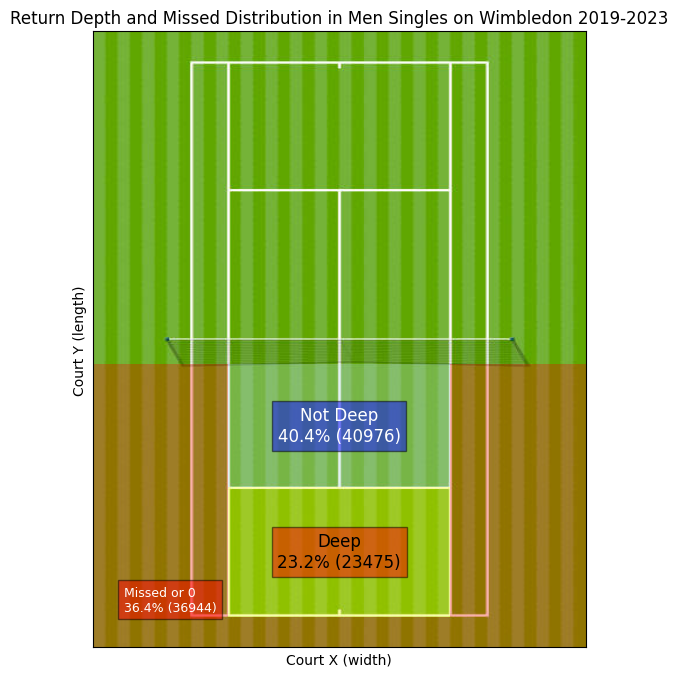

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Load your image
court_img = mpimg.imread('wimbledon_grass_court.jpg')

# Example counts of "Not Deep" (ND), "Deep" (D), and "Missed" (M) returns
nd_count = wim[wim['ReturnDepth'] == 'ND'].shape[0]
d_count = wim[wim['ReturnDepth'] == 'D'].shape[0]
m_count = wim[(wim['ReturnDepth'] == 'M') | (wim['ReturnDepth'] == '0')].shape[0]

# Total returns
total_count = nd_count + d_count + m_count

# Calculate percentages
nd_percentage = (nd_count / total_count) * 100
d_percentage = (d_count / total_count) * 100
m_percentage = (m_count / total_count) * 100

# Define court boundaries (adjust these depending on the image resolution)
court_x_min, court_x_max = 0, 80
court_y_min, court_y_max = 0, 100  # Example values, adjust to match your court image

# Coordinates for the shaded areas
# "Not Deep" region (net to service line)
not_deep_x_min = 22
not_deep_x_max = 58
not_deep_y_min = 26
not_deep_y_max = 46

# "Deep" region (service line to baseline)
deep_x_min = 22
deep_x_max = 58
deep_y_min = 5
deep_y_max = 26

# Display the tennis court image
plt.figure(figsize=(16, 8))

plt.imshow(court_img, extent=[court_x_min, court_x_max, court_y_min, court_y_max])

# Create shaded area for "Not Deep"
plt.gca().add_patch(patches.Rectangle((not_deep_x_min, not_deep_y_min), 
                                       not_deep_x_max - not_deep_x_min, 
                                       not_deep_y_max - not_deep_y_min,
                                       linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.3))

# Create shaded area for "Deep"
plt.gca().add_patch(patches.Rectangle((deep_x_min, deep_y_min), 
                                       deep_x_max - deep_x_min, 
                                       deep_y_max - deep_y_min,
                                       linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3))

# Create shaded area for "Missed" (rectangles based on your specifications)

plt.gca().add_patch(patches.Rectangle((0, 5), 22, 41, 
                                       linewidth=1, edgecolor='none', facecolor='red', alpha=0.3))

plt.gca().add_patch(patches.Rectangle((0, 0), 80, 5, 
                                       linewidth=1, edgecolor='none', facecolor='red', alpha=0.3))

plt.gca().add_patch(patches.Rectangle((58, 5), 22, 41, 
                                       linewidth=1, edgecolor='none', facecolor='red', alpha=0.3))

# Add text to display the percentage and total counts
plt.text((not_deep_x_min + not_deep_x_max) / 2, (not_deep_y_min + not_deep_y_max) / 2, 
         f'Not Deep\n{nd_percentage:.1f}% ({nd_count})', color='white', fontsize=12,
         ha='center', va='center', bbox=dict(facecolor='blue', alpha=0.5))

plt.text((deep_x_min + deep_x_max) / 2, (deep_y_min + deep_y_max) / 2, 
         f'Deep\n{d_percentage:.1f}% ({d_count})', color='black', fontsize=12,
         ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5))

plt.text((court_x_min + 5), 
         (court_y_max - 90), 
         f'Missed or 0\n{m_percentage:.1f}% ({m_count})', color='white', fontsize=9,
         ha='left', va='top', bbox=dict(facecolor='red', alpha=0.5))

plt.xlabel('Court X (width)')
plt.ylabel('Court Y (length)')
plt.title('Return Depth and Missed Distribution in Men Singles on Wimbledon 2019-2023')

# Hide axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()



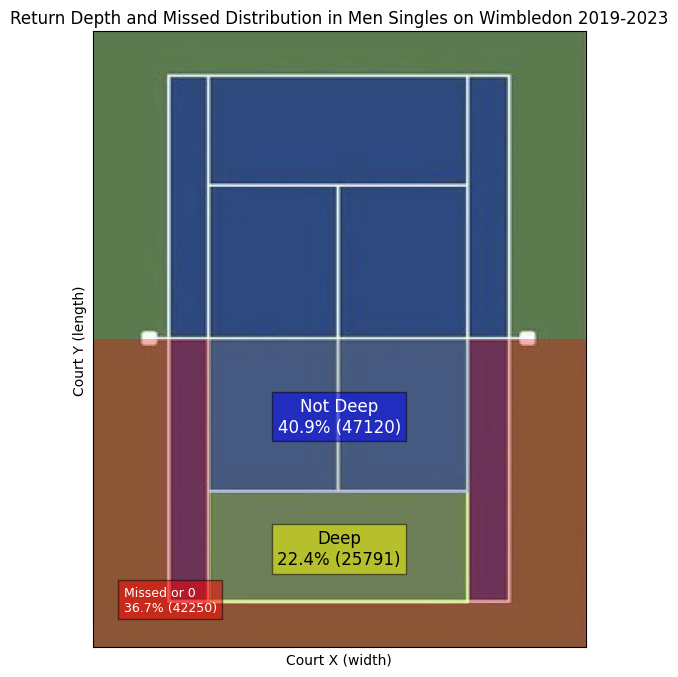

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Load your image
court_img = mpimg.imread('usopencourt.jpg')

# Example counts of "Not Deep" (ND), "Deep" (D), and "Missed" (M) returns
nd_count = us[us['ReturnDepth'] == 'ND'].shape[0]
d_count = us[us['ReturnDepth'] == 'D'].shape[0]
m_count = us[(us['ReturnDepth'] == 'M') | (us['ReturnDepth'] == '0')].shape[0]

# Total returns
total_count = nd_count + d_count + m_count

# Calculate percentages
nd_percentage = (nd_count / total_count) * 100
d_percentage = (d_count / total_count) * 100
m_percentage = (m_count / total_count) * 100

# Define court boundaries (adjust these depending on the image resolution)
court_x_min, court_x_max = 0, 80
court_y_min, court_y_max = 0, 100  # Example values, adjust to match your court image

# Coordinates for the shaded areas
# "Not Deep" region (net to service line)
not_deep_x_min = 19
not_deep_x_max = 61
not_deep_y_min = 25
not_deep_y_max = 50

# "Deep" region (service line to baseline)
deep_x_min = 19
deep_x_max = 61
deep_y_min = 7
deep_y_max = 25

# Display the tennis court image
plt.figure(figsize=(16, 8))

plt.imshow(court_img, extent=[court_x_min, court_x_max, court_y_min, court_y_max])

# Create shaded area for "Not Deep"
plt.gca().add_patch(patches.Rectangle((not_deep_x_min, not_deep_y_min), 
                                       not_deep_x_max - not_deep_x_min, 
                                       not_deep_y_max - not_deep_y_min,
                                       linewidth=1, edgecolor='none', facecolor='grey', alpha=0.3))

# Create shaded area for "Deep"
plt.gca().add_patch(patches.Rectangle((deep_x_min, deep_y_min), 
                                       deep_x_max - deep_x_min, 
                                       deep_y_max - deep_y_min,
                                       linewidth=1, edgecolor='none', facecolor='yellow', alpha=0.3))

# Create shaded area for "Missed" (rectangles based on your specifications)

# Rectangle (0, 5) to (22, 46)
plt.gca().add_patch(patches.Rectangle((0, 7), 19, 43, 
                                       linewidth=1, edgecolor='none', facecolor='red', alpha=0.3))

# Rectangle (0, 0) to (80, 5)
plt.gca().add_patch(patches.Rectangle((0, 0), 80, 7, 
                                       linewidth=1, edgecolor='none', facecolor='red', alpha=0.3))

# Rectangle (58, 5) to (80, 46)
plt.gca().add_patch(patches.Rectangle((61, 7), 22, 43, 
                                       linewidth=1, edgecolor='none', facecolor='red', alpha=0.3))

# Add text to display the percentage and total counts
plt.text((not_deep_x_min + not_deep_x_max) / 2, (not_deep_y_min + not_deep_y_max) / 2, 
         f'Not Deep\n{nd_percentage:.1f}% ({nd_count})', color='white', fontsize=12,
         ha='center', va='center', bbox=dict(facecolor='blue', alpha=0.5))

plt.text((deep_x_min + deep_x_max) / 2, (deep_y_min + deep_y_max) / 2, 
         f'Deep\n{d_percentage:.1f}% ({d_count})', color='black', fontsize=12,
         ha='center', va='center', bbox=dict(facecolor='yellow', alpha=0.5))

plt.text((court_x_min + 5), 
         (court_y_max - 90), 
         f'Missed or 0\n{m_percentage:.1f}% ({m_count})', color='white', fontsize=9,
         ha='left', va='top', bbox=dict(facecolor='red', alpha=0.5))

# Set axis labels and title
plt.xlabel('Court X (width)')
plt.ylabel('Court Y (length)')
plt.title('Return Depth and Missed Distribution in Men Singles on Wimbledon 2019-2023')

# Hide axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/1165397890.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctl_counts['percentage'] = (ctl_counts['count'] / total_shots) * 100
/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/1165397890.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nctl_counts['percentage'] = (nctl_counts['count'] / total_shots) * 100


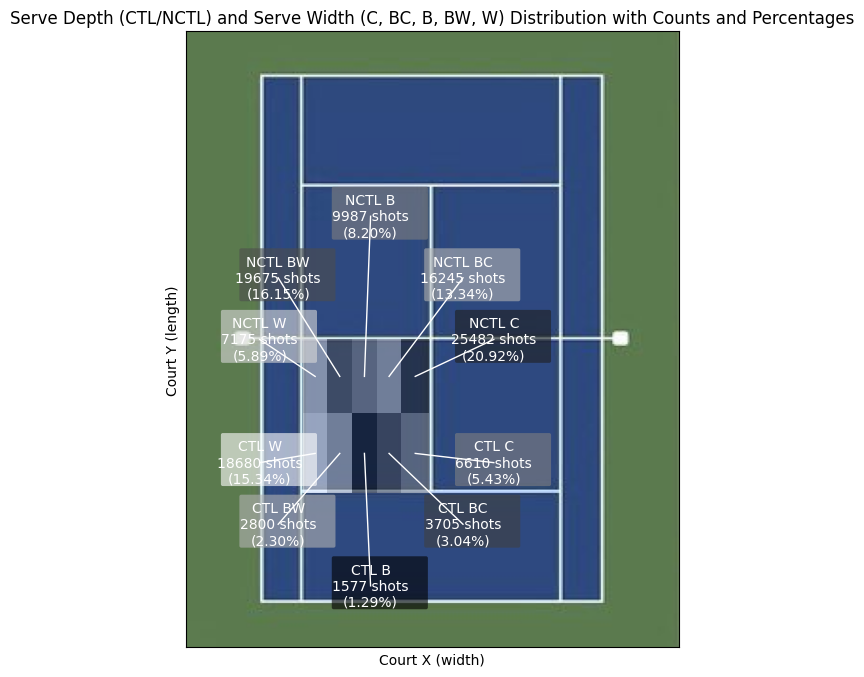

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Load your image
court_img = mpimg.imread('usopencourt.jpg')

# Total shots in the dataset
total_shots = us.shape[0]

# Calculate the counts for ServeDepth and ServeWidth categories
serve_depth_width_counts = us.groupby(['ServeDepth', 'ServeWidth']).size().reset_index(name='count')

# ServeDepth and ServeWidth categories counts
ctl_counts = serve_depth_width_counts[serve_depth_width_counts['ServeDepth'] == 'CTL']
nctl_counts = serve_depth_width_counts[serve_depth_width_counts['ServeDepth'] == 'NCTL']

# Calculate percentages for CTL and NCTL
ctl_counts['percentage'] = (ctl_counts['count'] / total_shots) * 100
nctl_counts['percentage'] = (nctl_counts['count'] / total_shots) * 100

# Display the tennis court image
plt.figure(figsize=(16, 8))
plt.imshow(court_img, extent=[court_x_min, court_x_max, court_y_min, court_y_max])

# Define the coordinates for ServeDepth and ServeWidth regions
# Adjust these coordinates based on your image size

# "CTL" (Close to the Line) ServeWidth categories (black to white)
regions_ctl = {
    'B': {'x_min': 27, 'x_max': 31, 'y_min': 25, 'y_max': 38, 'count': 1577.0, 'percentage': 1.294735, 'color': '#000000'},  # Black (fewest)
    'BC': {'x_min': 31, 'x_max': 35, 'y_min': 25, 'y_max': 38, 'count': 3705.0, 'percentage': 3.041847, 'color': '#404040'},  # Dark Gray
    'C': {'x_min': 35, 'x_max': 39.5, 'y_min': 25, 'y_max': 38, 'count': 6610.0, 'percentage': 5.426885, 'color': '#808080'},  # Medium Gray
    'BW': {'x_min': 23, 'x_max': 27, 'y_min': 25, 'y_max': 38, 'count': 2800.0, 'percentage': 2.298832, 'color': '#b3b3b3'},  # Light Gray
    'W': {'x_min': 19, 'x_max': 23, 'y_min': 25, 'y_max': 38, 'count': 18680.0, 'percentage': 15.336491, 'color': '#ffffff'},  # White (most)
}

# "NCTL" (Not Close to the Line) ServeWidth categories (black to white)
regions_nctl = {
    'W': {'x_min': 19, 'x_max': 23, 'y_min': 38, 'y_max': 50, 'count': 7175.0, 'percentage': 5.890756, 'color': '#d9d9d9'},  # Light Gray
    'B': {'x_min': 27, 'x_max': 31, 'y_min': 38, 'y_max': 50, 'count': 9987.0, 'percentage': 8.199440, 'color': '#808080'},  # Dark Gray
    'BW': {'x_min': 23, 'x_max': 27, 'y_min': 38, 'y_max': 50, 'count': 19675.0, 'percentage': 16.153398, 'color': '#4d4d4d'},  # Darker Gray
    'BC': {'x_min': 31, 'x_max': 35, 'y_min': 38, 'y_max': 50, 'count': 16245.0, 'percentage': 13.337329, 'color': '#b3b3b3'},  # Medium Gray
    'C': {'x_min': 35, 'x_max': 39.5, 'y_min': 38, 'y_max': 50, 'count': 25482.0, 'percentage': 20.921011, 'color': '#1f1f1f'},  # Near Black
}



# Function to add regions to the plot
def add_region(regions):
    for label, region in regions.items():
        plt.gca().add_patch(patches.Rectangle(
            (region['x_min'], region['y_min']),
            region['x_max'] - region['x_min'], 
            region['y_max'] - region['y_min'],
            linewidth=1, edgecolor='none', facecolor=region['color'], alpha=0.5
        ))

# Add CTL (hot colors) and NCTL (cool colors) regions
add_region(regions_ctl)
add_region(regions_nctl)

# Custom label coordinates for ServeWidth categories
label_positions = {
    'C': {'x': 50, 'y': 30},
    'BC': {'x': 45, 'y': 20},
    'B': {'x': 30, 'y': 10},
    'BW': {'x': 15, 'y': 20},
    'W': {'x': 12, 'y': 30}
}

# Function to add count and percentage labels with a small colored rectangle matching the region
def add_labels_for_regions(data_counts, label_positions, region_type, regions):
    for index, row in data_counts.iterrows():
        serve_width = row['ServeWidth']
        count = row['count']
        percentage = row['percentage']
        
        # Label format: "NCTL W\ncount shots\n(percentage%)"
        label = f"{region_type} {serve_width}\n{count} shots\n({percentage:.2f}%)"
        
        # Get the label position
        x = label_positions[serve_width]['x']
        y = label_positions[serve_width]['y']
        
        # Calculate center of the respective region for connecting line
        region_center_x = (regions[serve_width]['x_min'] + regions[serve_width]['x_max']) / 2
        region_center_y = (regions[serve_width]['y_min'] + regions[serve_width]['y_max']) / 2

        # Draw a line connecting the label to the region
        plt.plot([x, region_center_x], [y, region_center_y], color='white', lw=1)

        # Add a colored rectangle behind the label, matching the region color
        label_box = patches.FancyBboxPatch((x-6, y-3.5), 15, 8, boxstyle="round,pad=0.3", 
                                           edgecolor='none', facecolor=regions[serve_width]['color'], alpha=0.6)
        plt.gca().add_patch(label_box)
        
        # Add label text
        plt.text(x, y, label, fontsize=10, ha='center', va='center', color='white')

# Add labels for CTL (ServeWidth categories)
add_labels_for_regions(ctl_counts, label_positions, 'CTL', regions_ctl)

# Adjust label positions for NCTL (shift them down or choose new positions)
label_positions_nctl = {
    'C': {'x': 50, 'y': 50},
    'BC': {'x': 45, 'y': 60},
    'B': {'x': 30, 'y': 70},
    'BW': {'x': 15, 'y': 60},
    'W': {'x': 12, 'y': 50}
}

# Add labels for NCTL (ServeWidth categories)
add_labels_for_regions(nctl_counts, label_positions_nctl, 'NCTL', regions_nctl)

# Set axis labels and title
plt.xlabel('Court X (width)')
plt.ylabel('Court Y (length)')
plt.title('Serve Depth (CTL/NCTL) and Serve Width (C, BC, B, BW, W) Distribution with Counts and Percentages')

# Hide axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()




In [32]:
import pandas as pd

# Define all possible combinations of ServeDepth and ServeWidth
serve_depths = ['CTL', 'NCTL','0']
serve_widths = ['W', 'BW', 'B', 'BC', 'C','0']

# Create a DataFrame with all combinations
all_combinations = pd.MultiIndex.from_product([serve_depths, serve_widths], names=['ServeDepth', 'ServeWidth'])
all_counts = pd.DataFrame(index=all_combinations).reset_index()

# Count the occurrences of each combination
counts = wim.groupby(['ServeDepth', 'ServeWidth']).size().reset_index(name='count')

# Merge the counts with all combinations to fill in missing combinations with zero counts
all_counts = all_counts.merge(counts, on=['ServeDepth', 'ServeWidth'], how='left').fillna(0)

# Calculate percentages
all_counts['percentage'] = (all_counts['count'] / total_shots) * 100

# Display the counts and percentages
print(all_counts)


   ServeDepth ServeWidth    count  percentage
0         CTL          W  18385.0   15.094293
1         CTL         BW   2595.0    2.130524
2         CTL          B   1854.0    1.522155
3         CTL         BC   3555.0    2.918695
4         CTL          C   6588.0    5.408823
5         CTL          0      0.0    0.000000
6        NCTL          W   6704.0    5.504060
7        NCTL         BW  16282.0   13.367706
8        NCTL          B   9107.0    7.476950
9        NCTL         BC  13623.0   11.184637
10       NCTL          C  23153.0   19.008875
11       NCTL          0      0.0    0.000000
12          0          W      0.0    0.000000
13          0         BW      0.0    0.000000
14          0          B      0.0    0.000000
15          0         BC      0.0    0.000000
16          0          C      0.0    0.000000
17          0          0   3990.0    3.275835


In [33]:
# Assuming us and wim are pandas DataFrames
wimus = pd.concat([us, wim], ignore_index=True)
every = pd.concat([us, wim, rg, ao], ignore_index=True)
every.head()

,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,PointWinner,...,WinnerType,WinnerShotType,P1DistanceRun,P2DistanceRun,RallyCount,ServeWidth,ServeDepth,ReturnDepth,player1,player2
0,2019-usopen-1101,0:00:00,1,0.0,0.0,0.0,1,0.0,0X,0,...,0,0,0.000,0.000,0,NaN,NaN,NaN,Novak Djokovic,Roberto Carballes Baena
1,2019-usopen-1101,0:00:00,1,0.0,0.0,0.0,1,0.0,0Y,0,...,0,0,0.000,0.000,0,NaN,NaN,NaN,Novak Djokovic,Roberto Carballes Baena
2,2019-usopen-1101,0:00:00,1,0.0,0.0,0.0,1,0.0,1,1,...,0,0,29.095,33.480,9,BC,NCTL,D,Novak Djokovic,Roberto Carballes Baena
3,2019-usopen-1101,0:00:55,1,0.0,0.0,0.0,1,0.0,2,2,...,0,0,0.577,0.510,0,0,0,0,Novak Djokovic,Roberto Carballes Baena
4,2019-usopen-1101,0:01:22,1,0.0,0.0,0.0,1,0.0,3,1,...,0,0,14.642,8.791,5,C,NCTL,ND,Novak Djokovic,Roberto Carballes Baena


In [34]:
wimus['Returned'] = 0
wimus.loc[wimus['ReturnDepth'].isin(['ND', 'D']), 'Returned'] = 1

print(wimus.columns)

Index(['match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon', 'P2GamesWon',
       'SetWinner', 'GameNo', 'GameWinner', 'PointNumber', 'PointWinner',
       'PointServer', 'Speed_KMH', 'P1Score', 'P2Score', 'P1Momentum',
       'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1Ace', 'P2Ace',
       'P1Winner', 'P2Winner', 'P1DoubleFault', 'P2DoubleFault', 'P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint', 'P1BreakPointWon',
       'P2BreakPointWon', 'History', 'Speed_MPH', 'P1BreakPointMissed',
       'P2BreakPointMissed', 'ServeIndicator', 'ServeNumber', 'WinnerType',
       'WinnerShotType', 'P1DistanceRun', 'P2DistanceRun', 'RallyCount',
       'ServeWidth', 'ServeDepth', 'ReturnDepth', 'player1', 'player2',
       'Returned'],
      dtype='object')


In [35]:
import statsmodels.api as sm

# Prepare the data by removing any rows with NaN in avg_Forehand or avg_Backhand
regression_data = wimus[['Returned', 'Speed_MPH']].dropna()

X = regression_data[['Speed_MPH']]
X = sm.add_constant(X)  # Add intercept
y = regression_data['Returned']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Display the results
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.674566
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Returned   No. Observations:               230526
Model:                          Logit   Df Residuals:                   230524
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:               0.0001298
Time:                        23:56:19   Log-Likelihood:            -1.5550e+05
converged:                       True   LL-Null:                   -1.5553e+05
Covariance Type:            nonrobust   LLR p-value:                 2.108e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3465      0.008     44.356      0.000       0.331       0.362
Speed_MPH      0.0005   8.51e

The analysis indicates that the speed of the serve has little to no significant effect on whether the ball is returned. The relatively low standard errors suggest that the logistic regression model fits the dataset well, even though the effect size of serve speed on the likelihood of returning the ball is minimal.

In [36]:
# Standardize names based on the full version of the name
def standardize_names(series):
    # Create a dictionary to hold standardized names
    standardized = {}
    
    for name in series:
        # Split into first name and last name
        parts = name.split()
        if len(parts) < 2:
            continue  # Skip invalid names
        
        first_initial, last_name = parts[0][0], parts[1]
        full_key = f"{first_initial} {last_name}"
        
        # If we encounter the first full name for this pattern, use it as the standard
        if full_key not in standardized:
            standardized[full_key] = name
        
    # Replace names with the standardized version
    return series.apply(lambda x: standardized.get(f"{x.split()[0][0]} {x.split()[1]}", x))

# Apply standardization to both player1 and player2 columns in the `every` dataset
every['player1'] = standardize_names(every['player1'])
every['player2'] = standardize_names(every['player2'])


player1_counts = every['player1'].value_counts()
player2_counts = every['player2'].value_counts()

# Display value counts
print("Value counts for player1:")
print(player1_counts)

print("\nValue counts for player2:")
print(player2_counts)

Value counts for player1:
player1
Novak Djokovic         14043
Alexander Zverev        6802
Stefanos Tsitsipas      6566
Denis Shapovalov        6002
Daniil Medvedev         5852
                       ...  
M. Janvier               147
C Stebe                  144
R. Harrison              142
Juan Pablo Varillas      140
Bernard Tomic            127
Name: count, Length: 279, dtype: int64

Value counts for player2:
player2
Rafael Nadal         8699
Daniil Medvedev      7531
Alexander Zverev     6614
Andrey Rublev        6332
Diego Schwartzman    5572
                     ... 
A. Tabilo             156
R. Harrison           152
Stefan Kozlov         147
G. Sakharov           146
Marcel Granollers       2
Name: count, Length: 281, dtype: int64


In [37]:
# Extract first and last names from player1 and player2
every['first_name_player1'] = every['player1'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
every['last_name_player1'] = every['player1'].apply(lambda x: x.split()[-1] if pd.notnull(x) else None)
every['first_name_player2'] = every['player2'].apply(lambda x: x.split()[0] if pd.notnull(x) else None)
every['last_name_player2'] = every['player2'].apply(lambda x: x.split()[-1] if pd.notnull(x) else None)

# Combine first and last names from both columns
all_names = pd.DataFrame({
    'first_name': pd.concat([every['first_name_player1'], every['first_name_player2']]),
    'last_name': pd.concat([every['last_name_player1'], every['last_name_player2']])
}).dropna()

# Group by last name and find last names with multiple first names
last_name_groups = all_names.groupby('last_name')['first_name'].apply(list)
duplicate_last_names = last_name_groups[last_name_groups.apply(lambda x: len(set(x)) > 1)]

# Display full names for duplicate last names
print("Full names with the same last name but different first names:")
for last_name, first_names in duplicate_last_names.items():
    unique_first_names = set(first_names)  # Get unique first names
    print(f"Last Name: {last_name}")
    for first_name in unique_first_names:
        print(f"  {first_name} {last_name}")



Full names with the same last name but different first names:
Last Name: Benchetrit
  E Benchetrit
  E. Benchetrit
Last Name: Cazaux
  Arthur Cazaux
  A Cazaux
Last Name: Cerundolo
  Juan Cerundolo
  Francisco Cerundolo
Last Name: Coppejans
  K. Coppejans
  Kimmer Coppejans
Last Name: Darcis
  S. Darcis
  Steve Darcis
Last Name: Donskoy
  E. Donskoy
  Evgeny Donskoy
Last Name: Dzumhur
  Damir Dzumhur
  D. Dzumhur
Last Name: Ebden
  M. Ebden
  Matthew Ebden
Last Name: Fratangelo
  B. Fratangelo
  B Fratangelo
Last Name: Galan
  De Galan
  Daniel Galan
Last Name: Gaston
  Hugo Gaston
  H Gaston
Last Name: Gombos
  N Gombos
  Norbert Gombos
Last Name: Gulbis
  Ernests Gulbis
  E. Gulbis
Last Name: Gunneswaran
  Prajnesh Gunneswaran
  P. Gunneswaran
Last Name: Harris
  Lloyd Harris
  A. Harris
Last Name: Harrison
  R. Harrison
  Christian Harrison
Last Name: Herbert
  Pierre Herbert
  P. Herbert
Last Name: Janvier
  M. Janvier
  M Janvier
Last Name: Jaziri
  M. Jaziri
  Malek Jaziri
Last N

/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/4188663787.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctl_counts['percentage'] = (ctl_counts['count'] / total_shots) * 100
/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/4188663787.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nctl_counts['percentage'] = (nctl_counts['count'] / total_shots) * 100


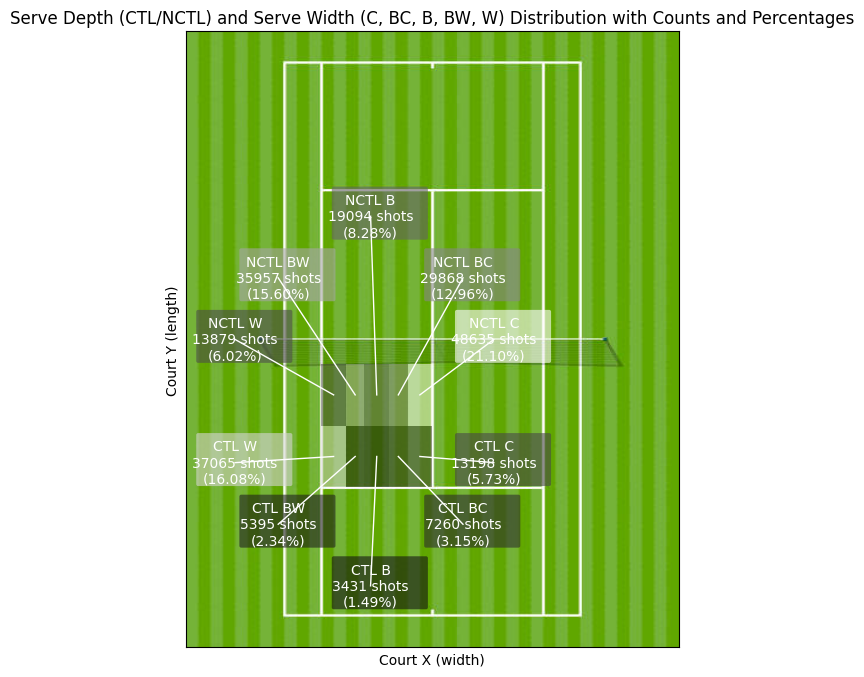

In [38]:
# Load your image
court_img = mpimg.imread('wimbledon_grass_court.jpg')

# Total shots in the dataset
total_shots = wimus.shape[0]

# Calculate the counts for ServeDepth and ServeWidth categories
serve_depth_width_counts = wimus.groupby(['ServeDepth', 'ServeWidth']).size().reset_index(name='count')

# ServeDepth and ServeWidth categories counts
ctl_counts = serve_depth_width_counts[serve_depth_width_counts['ServeDepth'] == 'CTL']
nctl_counts = serve_depth_width_counts[serve_depth_width_counts['ServeDepth'] == 'NCTL']

# Calculate percentages for CTL and NCTL
ctl_counts['percentage'] = (ctl_counts['count'] / total_shots) * 100
nctl_counts['percentage'] = (nctl_counts['count'] / total_shots) * 100

# Display the tennis court image
plt.figure(figsize=(16, 8))
plt.imshow(court_img, extent=[court_x_min, court_x_max, court_y_min, court_y_max])

# Define the coordinates for ServeDepth and ServeWidth regions
# Adjust these coordinates based on your image size

# "CTL" (Close to the Line) ServeWidth categories (hot colors)
regions_ctl = {
    'W': {'x_min': 22, 'x_max': 26, 'y_min': 26, 'y_max': 36, 'count': 18385.0, 'percentage': 15.094293, 'color': '#d7d7d7'},  # Light gray
    'BW': {'x_min': 26, 'x_max': 29, 'y_min': 26, 'y_max': 36, 'count': 2595.0, 'percentage': 2.130524, 'color': '#1f1f1f'},  # Dark gray
    'B': {'x_min': 29, 'x_max': 33, 'y_min': 26, 'y_max': 36, 'count': 1854.0, 'percentage': 1.522155, 'color': '#141414'},  # Near black
    'BC': {'x_min': 33, 'x_max': 36, 'y_min': 26, 'y_max': 36, 'count': 3555.0, 'percentage': 2.918695, 'color': '#2d2d2d'},  # Dark gray
    'C': {'x_min': 36, 'x_max': 40, 'y_min': 26, 'y_max': 36, 'count': 6588.0, 'percentage': 5.408823, 'color': '#484848'},  # Medium gray
}

regions_nctl = {
    'W': {'x_min': 22, 'x_max': 26, 'y_min': 36, 'y_max': 46, 'count': 6704.0, 'percentage': 5.504060, 'color': '#4d4d4d'},  # Medium gray
    'BW': {'x_min': 26, 'x_max': 29, 'y_min': 36, 'y_max': 46, 'count': 16282.0, 'percentage': 13.367706, 'color': '#a7a7a7'},  # Light gray
    'B': {'x_min': 29, 'x_max': 33, 'y_min': 36, 'y_max': 46, 'count': 9107.0, 'percentage': 7.476950, 'color': '#636363'},  # Medium gray
    'BC': {'x_min': 33, 'x_max': 36, 'y_min': 36, 'y_max': 46, 'count': 13623.0, 'percentage': 11.184637, 'color': '#888888'},  # Light gray
    'C': {'x_min': 36, 'x_max': 40, 'y_min': 36, 'y_max': 46, 'count': 23153.0, 'percentage': 19.008875, 'color': '#ffffff'},  # White
}



# Function to add regions to the plot
def add_region(regions):
    for label, region in regions.items():
        plt.gca().add_patch(patches.Rectangle(
            (region['x_min'], region['y_min']),
            region['x_max'] - region['x_min'], 
            region['y_max'] - region['y_min'],
            linewidth=1, edgecolor='none', facecolor=region['color'], alpha=0.5
        ))

# Add CTL (hot colors) and NCTL (cool colors) regions
add_region(regions_ctl)
add_region(regions_nctl)

# Custom label coordinates for ServeWidth categories
label_positions = {
    'C': {'x': 50, 'y': 30},
    'BC': {'x': 45, 'y': 20},
    'B': {'x': 30, 'y': 10},
    'BW': {'x': 15, 'y': 20},
    'W': {'x': 8, 'y': 30}
}

# Function to add count and percentage labels with a small colored rectangle matching the region
def add_labels_for_regions(data_counts, label_positions, region_type, regions):
    for index, row in data_counts.iterrows():
        serve_width = row['ServeWidth']
        count = row['count']
        percentage = row['percentage']
        label = f"{region_type} {serve_width}\n{count} shots\n({percentage:.2f}%)"
        
        # Get the label position
        x = label_positions[serve_width]['x']
        y = label_positions[serve_width]['y']
        
        # Calculate center of the respective region for connecting line
        region_center_x = (regions[serve_width]['x_min'] + regions[serve_width]['x_max']) / 2
        region_center_y = (regions[serve_width]['y_min'] + regions[serve_width]['y_max']) / 2

        # Draw a line connecting the label to the region
        plt.plot([x, region_center_x], [y, region_center_y], color='white', lw=1)

        # Add a colored rectangle behind the label, matching the region color
        label_box = patches.FancyBboxPatch((x-6, y-3.5), 15, 8, boxstyle="round,pad=0.3", 
                                           edgecolor='none', facecolor=regions[serve_width]['color'], alpha=0.6)
        plt.gca().add_patch(label_box)
        
        # Add label text
        plt.text(x, y, label, fontsize=10, ha='center', va='center', color='white')

# Add labels for CTL (ServeWidth categories)
add_labels_for_regions(ctl_counts, label_positions, 'CTL', regions_ctl)

# Adjust label positions for NCTL (shift them down or choose new positions)
label_positions_nctl = {
    'C': {'x': 50, 'y': 50},
    'BC': {'x': 45, 'y': 60},
    'B': {'x': 30, 'y': 70},
    'BW': {'x': 15, 'y': 60},
    'W': {'x': 8, 'y': 50}
}

# Add labels for NCTL (ServeWidth categories)
add_labels_for_regions(nctl_counts, label_positions_nctl, 'NCTL', regions_nctl)

# Set axis labels and title
plt.xlabel('Court X (width)')
plt.ylabel('Court Y (length)')
plt.title('Serve Depth (CTL/NCTL) and Serve Width (C, BC, B, BW, W) Distribution with Counts and Percentages')

# Hide axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


In [39]:
y = pd.to_numeric(y, errors='coerce')
X = X.apply(pd.to_numeric, errors='coerce')

We observe that the using a Close to the Line serve (CTL) will give players a higher chance in winning a point, compared to Not Close to the Line (NCTL), while Center (C) and Wide (W) will give players a higher a chance in winning a point than other positions of Serve Width.

In [40]:
import pandas as pd

# Assuming gs19, gs20, gs21, gs22, and gs23 are pandas DataFrames
gs = pd.concat([gs19, gs20, gs21, gs22, gs23], ignore_index=True)


In [41]:
# Filter, only include Grand Slam matches
gs = gs[gs['tourney_level'] == "G"]

In [42]:
# Create the DoubleFault column with categorical values
wimus['DoubleFault'] = pd.Categorical(((wimus['P1DoubleFault'] == 1) | (wimus['P2DoubleFault'] == 1)).astype(int))


                            OLS Regression Results                            
Dep. Variable:             RallyCount   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4241.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:56:21   Log-Likelihood:            -4.4509e+05
No. Observations:              165624   AIC:                         8.902e+05
Df Residuals:                  165622   BIC:                         8.902e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8883      0.067    117.760      0.0

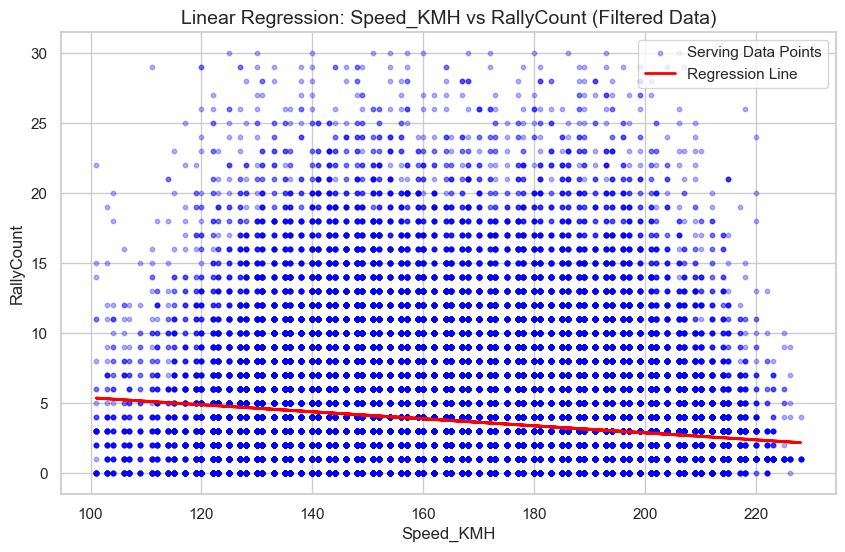

In [43]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set(style='whitegrid')

# Filter the data to include Speed_KMH > 100 and Speed_KMH < 230, and RallyCount <= 30
filtered_data = wimus[(wimus['Speed_KMH'] > 100) & (wimus['Speed_KMH'] < 230) & (wimus['RallyCount'] <= 30)]

# Independent variable (Speed_KMH) and dependent variable (RallyCount) from the filtered data
X = filtered_data['Speed_KMH']
y = filtered_data['RallyCount']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Output the summary of the linear regression model
print(result.summary())

# Plotting
plt.figure(figsize=(10, 6))

# Use a scatter plot with reduced marker size and transparency
plt.scatter(filtered_data['Speed_KMH'], filtered_data['RallyCount'], 
            color='blue', s=10, alpha=0.3, label='Serving Data Points')

# Plot the regression line
plt.plot(filtered_data['Speed_KMH'], result.predict(X), color='red', linewidth=2, label='Regression Line')

# Adding titles and labels
plt.xlabel('Speed_KMH', fontsize=12)
plt.ylabel('RallyCount', fontsize=12)
plt.title('Linear Regression: Speed_KMH vs RallyCount (Filtered Data)', fontsize=14)
plt.legend()

# Show the plot
plt.show()


The R squared is relatively low, suggesting that only 2.5% of the RallyCount is explained by the variation of Speed_KMH (serve). Thus, this regression model is not reliable.

In [44]:
import pandas as pd

# Stack player1 and player2 into a single 'player' column
wimus_long = pd.melt(every, 
                     id_vars=['ServeWidth', 'ServeDepth', 'ReturnDepth', 'Speed_KMH', 'ServeNumber'], 
                     value_vars=['player1', 'player2'], 
                     var_name='PlayerType', value_name='player_name')

# Group by the player_name and calculate the necessary aggregates
grouped_data = wimus_long.groupby('player_name').agg(
    ServeWidth_count=('ServeWidth', 'count'),
    ServeDepth_count=('ServeDepth', 'count'),
    ReturnDepth_count=('ReturnDepth', 'count'),
    Avg_1st_ServeSpeed=('Speed_KMH', lambda x: x[wimus_long['ServeNumber'] == 1].mean()),
    Avg_2nd_ServeSpeed=('Speed_KMH', lambda x: x[wimus_long['ServeNumber'] == 2].mean())
).reset_index()



In [45]:
import pandas as pd

# Step 1: Melt the gs_m dataset to get player names
gs_m_long = pd.melt(gs_m, 
                     id_vars=['match_id'], 
                     value_vars=['player1', 'player2'], 
                     var_name='PlayerType', 
                     value_name='player_name')

# Standardize player names to a consistent format (capitalize first letter of each word)
gs_m_long['player_name'] = gs_m_long['player_name'].str.title()

# Count rows where each player appears as a winner
matches_as_winner = gs['winner_name'].value_counts()

# Count rows where each player appears as a loser
matches_as_loser = gs['loser_name'].value_counts()

# Combine counts to get total matches played
matches_played = (matches_as_winner + matches_as_loser).rename('match_played')

# Convert to DataFrame for merging
matches_played = matches_played.reset_index().rename(columns={'index': 'player_name'})


# Step 2: Melt the wimus dataset to get player statistics
wimus_long = pd.melt(every, 
                     id_vars=['match_id', 'ServeWidth', 'ServeDepth', 'ReturnDepth', 'Speed_KMH', 'ServeNumber', 'PointServer', 'WinnerShotType'],  # include PointServer column
                     value_vars=['player1', 'player2'], 
                     var_name='PlayerType', 
                     value_name='player_name')

# Standardize player names in wimus dataset
wimus_long['player_name'] = wimus_long['player_name'].str.title()

# Step 3: Filter based on PointServer for Serve_Depth_Width
# If PlayerType == 'player1', count only rows where PointServer == 1
# If PlayerType == 'player2', count only rows where PointServer == 2
wimus_long_serve = wimus_long[
    ((wimus_long['PlayerType'] == 'player1') & (wimus_long['PointServer'] == 1)) | 
    ((wimus_long['PlayerType'] == 'player2') & (wimus_long['PointServer'] == 2))
].copy()  # Create a copy to avoid SettingWithCopyWarning

# Safely concatenate ServeDepth and ServeWidth into a new column Serve_Depth_Width
wimus_long_serve['Serve_Depth_Width'] = wimus_long_serve['ServeDepth'] + '_' + wimus_long_serve['ServeWidth']

# Step 4: Count the occurrences of each Serve_Depth_Width value for each player
serve_depth_width_counts = wimus_long_serve.groupby('player_name')['Serve_Depth_Width'].value_counts().unstack(fill_value=0)

# Step 5: Filter based on PointServer for ReturnDepth
# If PlayerType == 'player1', count rows where PointServer == 1 or PointServer == 2
# If PlayerType == 'player2', count only rows where PointServer == 1
wimus_long_return = wimus_long[
    ((wimus_long['PlayerType'] == 'player1') & ((wimus_long['PointServer'] == 1) | (wimus_long['PointServer'] == 2))) | 
    ((wimus_long['PlayerType'] == 'player2') & (wimus_long['PointServer'] == 1))
].copy()  # Create a copy to avoid SettingWithCopyWarning

# Step 6: Count the occurrences of each ReturnDepth value for each player
return_depth_counts = wimus_long_return.groupby('player_name')['ReturnDepth'].value_counts().unstack(fill_value=0)

# Step 7: Calculate the average 1st and 2nd serve speeds for each player, excluding Speed_KMH == 0
avg_serve_speeds = wimus_long.groupby('player_name').agg(
    Avg_1st_ServeSpeed=('Speed_KMH', lambda x: x[(wimus_long['ServeNumber'] == 1) & (x > 0)].mean()),
    Avg_2nd_ServeSpeed=('Speed_KMH', lambda x: x[(wimus_long['ServeNumber'] == 2) & (x > 0)].mean())
)

# Step 8: Merge counts and serve speeds with matches played
player_stats = pd.concat([serve_depth_width_counts, return_depth_counts, avg_serve_speeds], axis=1)


# Step 9: Filter rows where WinnerShotType is either 'F' or 'B'
winner_shot_counts = wimus_long[wimus_long['WinnerShotType'].isin(['F', 'B'])]

# Step 10: Count the occurrences of each WinnerShotType ('F' or 'B') for each player
winner_shot_counts = winner_shot_counts.groupby('player_name')['WinnerShotType'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
winner_shot_counts.columns = ['Backhand_Winners', 'Forehand_Winners']

# Step 11: Merge the winner shot counts into the player_stats DataFrame
player_stats = pd.concat([player_stats, winner_shot_counts], axis=1)
player_stats = player_stats.reset_index()

player_stats = pd.merge(player_stats, matches_played, how='left', on='player_name')


# Display the resulting dataframe
player_stats.head()


,player_name,0_0,CTL_B,CTL_BC,CTL_BW,CTL_C,CTL_W,NCTL_B,NCTL_BC,NCTL_BW,...,NCTL_W,0,D,M,ND,Avg_1st_ServeSpeed,Avg_2nd_ServeSpeed,Backhand_Winners,Forehand_Winners,match_played
0,Adrian Mannarino,45.0,27.0,50.0,27.0,87.0,315.0,116.0,276.0,316.0,...,113.0,217.0,617.0,659.0,1120.0,179.031844,144.949219,256.0,459.0,33.0
1,Alastair Gray,4.0,0.0,1.0,3.0,5.0,14.0,13.0,20.0,30.0,...,9.0,8.0,67.0,0.0,122.0,NaN,NaN,26.0,41.0,2.0
2,Albert Ramos Vinolas,39.0,11.0,40.0,20.0,36.0,130.0,67.0,138.0,97.0,...,40.0,152.0,201.0,363.0,383.0,176.865440,148.683333,121.0,288.0,NaN
3,Alejandro Davidovich Fokina,74.0,62.0,96.0,65.0,82.0,246.0,292.0,359.0,301.0,...,90.0,223.0,720.0,557.0,1255.0,179.830910,147.652439,269.0,600.0,36.0
4,Alejandro Tabilo,28.0,8.0,28.0,20.0,29.0,106.0,37.0,71.0,91.0,...,36.0,66.0,307.0,88.0,520.0,177.158317,145.105058,85.0,164.0,7.0


In [46]:
# Ensure matches_as_winner is a Series with player_name as index
matches_as_winner = matches_as_winner.rename_axis('player_name').reset_index(name='matches_as_winner')

# Merge matches_as_winner into player_stats
player_stats = pd.merge(player_stats, matches_as_winner, how='left', on='player_name')

# Calculate Match_Win_Percentage
player_stats['Match_Win_Percentage'] = (player_stats['matches_as_winner'] / player_stats['match_played']) * 100


In [47]:
# Now map the heights as before
winner_ht_map = dict(zip(gs['winner_name'], gs['winner_ht']))
loser_ht_map = dict(zip(gs['loser_name'], gs['loser_ht']))

# Map the heights to player_stats based on player_name
player_stats['height'] = player_stats['player_name'].map(winner_ht_map).fillna(player_stats['player_name'].map(loser_ht_map))


In [48]:
# Create a dictionary to map player_name to their height (both winners and losers)
winner_ht_map = dict(zip(gs['winner_name'], gs['winner_ht']))
loser_ht_map = dict(zip(gs['loser_name'], gs['loser_ht']))

# Map the heights to player_stats based on player_name
player_stats['height'] = player_stats['player_name'].map(winner_ht_map).fillna(player_stats['player_name'].map(loser_ht_map))



In [49]:
import pandas as pd

# Step 1: Count the number of NaN values in each row
na_counts = player_stats.isnull().sum(axis=1)

# Step 2: Filter out rows with more than 5 NaN values
player_stats = player_stats[na_counts <= 5]





In [50]:
import pandas as pd

def merge_and_aggregate(gs_dataset, player_stats):
    # Merge for winner stats
    winner_merge = gs[['winner_name', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
                               'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'winner_rank', 'winner_rank_points']].copy()
    
    # Rename 'w_' columns to remove the prefix
    winner_merge.columns = ['player_name', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms',
                            'bpSaved', 'bpFaced', 'rank', 'rank_points']

    # Merge for loser stats
    loser_merge = gs[['loser_name', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon',
                              'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'loser_rank', 'loser_rank_points']].copy()
    
    # Rename 'l_' columns to remove the prefix
    loser_merge.columns = ['player_name', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms',
                           'bpSaved', 'bpFaced', 'rank', 'rank_points']

    # Concatenate winner and loser stats into a single DataFrame
    combined = pd.concat([winner_merge, loser_merge], ignore_index=True)
    
    # Group by player_name and sum up the statistics for each player
    aggregated_stats = combined.groupby('player_name').sum().reset_index()
    player_stats_merged = pd.merge(player_stats, aggregated_stats, how='left', left_on='player_name', right_on='player_name')
    return player_stats_merged

# Example usage:
merged_stats = merge_and_aggregate(gs, player_stats)

# Save or inspect the result
# merged_stats.to_csv('merged_player_stats.csv', index=False)
merged_stats.head()


,player_name,0_0,CTL_B,CTL_BC,CTL_BW,CTL_C,CTL_W,NCTL_B,NCTL_BC,NCTL_BW,...,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points
0,Adrian Mannarino,45.0,27.0,50.0,27.0,87.0,315.0,116.0,276.0,316.0,...,97.0,3714.0,2227.0,1546.0,749.0,566.0,231.0,366.0,1584.0,37238.0
1,Alastair Gray,4.0,0.0,1.0,3.0,5.0,14.0,13.0,20.0,30.0,...,8.0,205.0,130.0,97.0,34.0,29.0,14.0,19.0,576.0,346.0
2,Albert Ramos Vinolas,39.0,11.0,40.0,20.0,36.0,130.0,67.0,138.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alejandro Davidovich Fokina,74.0,62.0,96.0,65.0,82.0,246.0,292.0,359.0,301.0,...,133.0,4416.0,2954.0,1961.0,758.0,691.0,215.0,383.0,1831.0,41039.0
4,Alejandro Tabilo,28.0,8.0,28.0,20.0,29.0,106.0,37.0,71.0,91.0,...,39.0,896.0,575.0,411.0,154.0,139.0,46.0,76.0,849.0,3868.0


In [51]:
import pandas as pd

def classify_rank_elite(gs, player_stats):
    # Handle winner stats
    winner_ranks = gs[['winner_name', 'winner_rank', 'tourney_id']].copy()
    winner_ranks.columns = ['player_name', 'rank', 'tourney_id']

    # Handle loser stats
    loser_ranks = gs[['loser_name', 'loser_rank', 'tourney_id']].copy()
    loser_ranks.columns = ['player_name', 'rank', 'tourney_id']

    # Combine winner and loser ranks
    combined_ranks = pd.concat([winner_ranks, loser_ranks], ignore_index=True)

    # Calculate the average rank for each player
    avg_ranks = combined_ranks.groupby('player_name')['rank'].mean().reset_index()

    # Find if the player has rank <= 8.1 in 4 or more tournaments
    elite_tourney = combined_ranks[combined_ranks['rank'] <= 8.1].groupby('player_name').tourney_id.nunique().reset_index()
    elite_tourney['is_elite_tourney'] = elite_tourney['tourney_id'] >= 4  # At least 4 different tournaments with rank <= 8.1

    # Merge with avg_ranks to get both conditions
    avg_ranks = pd.merge(avg_ranks, elite_tourney[['player_name', 'is_elite_tourney']], how='left', on='player_name')

    # Fill NaN values in is_elite_tourney with False (for players with less than 4 tournaments)
    avg_ranks['is_elite_tourney'].fillna(False, inplace=True)

    # Classify players as Elite (E) or Non-Elite (NE) based on both conditions
    avg_ranks['rank_elite'] = avg_ranks.apply(lambda row: 'E' if row['rank'] <= 17 or row['is_elite_tourney'] else 'NE', axis=1)

    # Merge the rank classification back into the player_stats dataset
    player_stats_merged = pd.merge(merged_stats, avg_ranks[['player_name', 'rank_elite']], how='left', on='player_name')

    return player_stats_merged

player_stats = classify_rank_elite(gs, player_stats)





/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/42039394.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avg_ranks['is_elite_tourney'].fillna(False, inplace=True)
/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/42039394.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

In [52]:
# Filter the players where rank_elite is 'E'
elite_players = player_stats[player_stats['rank_elite'] == 'E']['player_name'].tolist()

# Output the list of elite players
print(elite_players)


['Alexander Zverev', 'Andrey Rublev', 'Carlos Alcaraz', 'Casper Ruud', 'Daniil Medvedev', 'Dominic Thiem', 'Felix Auger Aliassime', 'Matteo Berrettini', 'Novak Djokovic', 'Rafael Nadal', 'Roger Federer', 'Stefanos Tsitsipas']


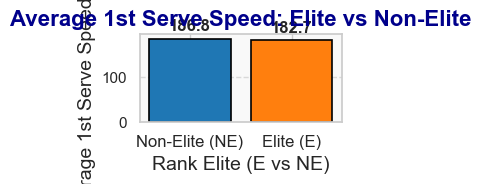

In [53]:
def plot_avg_1st_serve_by_rank_elite(player_stats):
    # Group the data by rank_elite and calculate the average 1st serve speed
    serve_speeds = player_stats.groupby('rank_elite')['Avg_1st_ServeSpeed'].mean().reset_index()

    # Create a bar chart
    fig, ax = plt.subplots(figsize=(3, 2))
    bars = ax.bar(serve_speeds['rank_elite'], serve_speeds['Avg_1st_ServeSpeed'], 
                  color=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=1.2)

    # Adding value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',  # Format the label
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Label position
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Adding title and labels
    ax.set_title('Average 1st Serve Speed: Elite vs Non-Elite', fontsize=16, fontweight='bold', color='darkblue')
    ax.set_xlabel('Rank Elite (E vs NE)', fontsize=14)
    ax.set_ylabel('Average 1st Serve Speed (km/h)', fontsize=14)

    # Customize ticks and grid
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Non-Elite (NE)', 'Elite (E)'], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Set background color
    ax.set_facecolor('#f9f9f9')

    # Display the bar chart
    plt.tight_layout()
    plt.show()

plot_avg_1st_serve_by_rank_elite(player_stats)




/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/1691057835.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


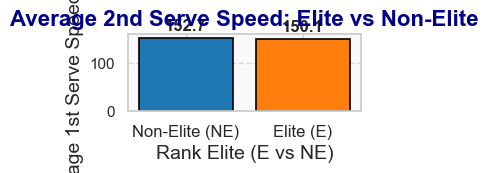

In [54]:
def plot_avg_1st_serve_by_rank_elite(player_stats):
    # Group the data by rank_elite and calculate the average 1st serve speed
    serve_speeds = player_stats.groupby('rank_elite')['Avg_2nd_ServeSpeed'].mean().reset_index()

    # Create a bar chart
    fig, ax = plt.subplots(figsize=(3, 1))
    bars = ax.bar(serve_speeds['rank_elite'], serve_speeds['Avg_2nd_ServeSpeed'], 
                  color=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=1.2)

    # Adding value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',  # Format the label
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Label position
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Adding title and labels
    ax.set_title('Average 2nd Serve Speed: Elite vs Non-Elite', fontsize=16, fontweight='bold', color='darkblue')
    ax.set_xlabel('Rank Elite (E vs NE)', fontsize=14)
    ax.set_ylabel('Average 1st Serve Speed (km/h)', fontsize=14)

    # Customize ticks and grid
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Non-Elite (NE)', 'Elite (E)'], fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Set background color
    ax.set_facecolor('#f9f9f9')

    # Display the bar chart
    plt.tight_layout()
    plt.show()

# Example usage
plot_avg_1st_serve_by_rank_elite(player_stats)

This implies that in fact the Elite player has a weaker serve in terms of speed, which suggested that speed is not a significant key component for being a great player. 

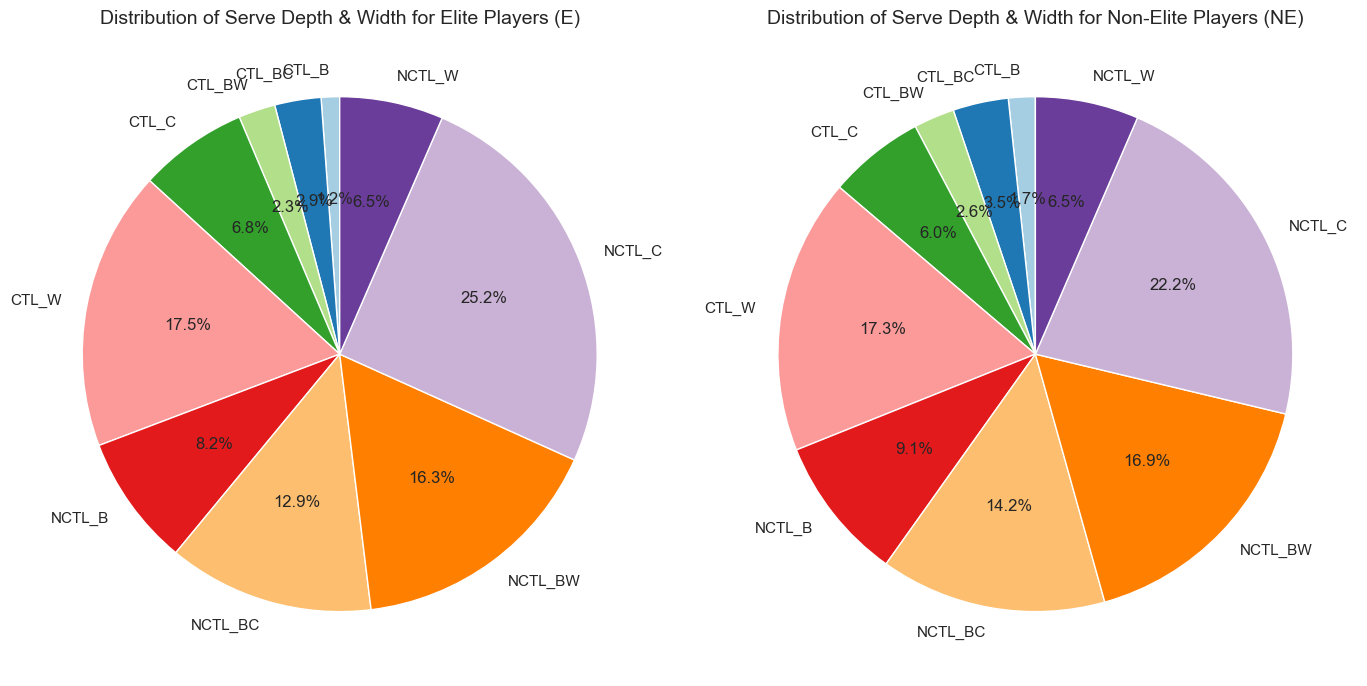

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_charts_for_serve_depth_width(player_stats):
    # List of serve categories
    categories = ['CTL_B', 'CTL_BC', 'CTL_BW', 'CTL_C', 'CTL_W', 'NCTL_B', 'NCTL_BC', 'NCTL_BW', 'NCTL_C', 'NCTL_W']

    # Grouping by rank_elite ('E' and 'NE')
    group_e = player_stats[player_stats['rank_elite'] == 'E'][categories].sum()
    group_ne = player_stats[player_stats['rank_elite'] == 'NE'][categories].sum()

    # Calculate percentages for each group
    group_e_percentage = (group_e / group_e.sum()) * 100
    group_ne_percentage = (group_ne / group_ne.sum()) * 100

    # Plotting the pie chart for Elite players
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    ax[0].pie(group_e_percentage, labels=categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax[0].set_title('Distribution of Serve Depth & Width for Elite Players (E)', fontsize=14)

    # Plotting the pie chart for Non-Elite players
    ax[1].pie(group_ne_percentage, labels=categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax[1].set_title('Distribution of Serve Depth & Width for Non-Elite Players (NE)', fontsize=14)

    plt.tight_layout()
    plt.show()

# Example usage
plot_pie_charts_for_serve_depth_width(player_stats)


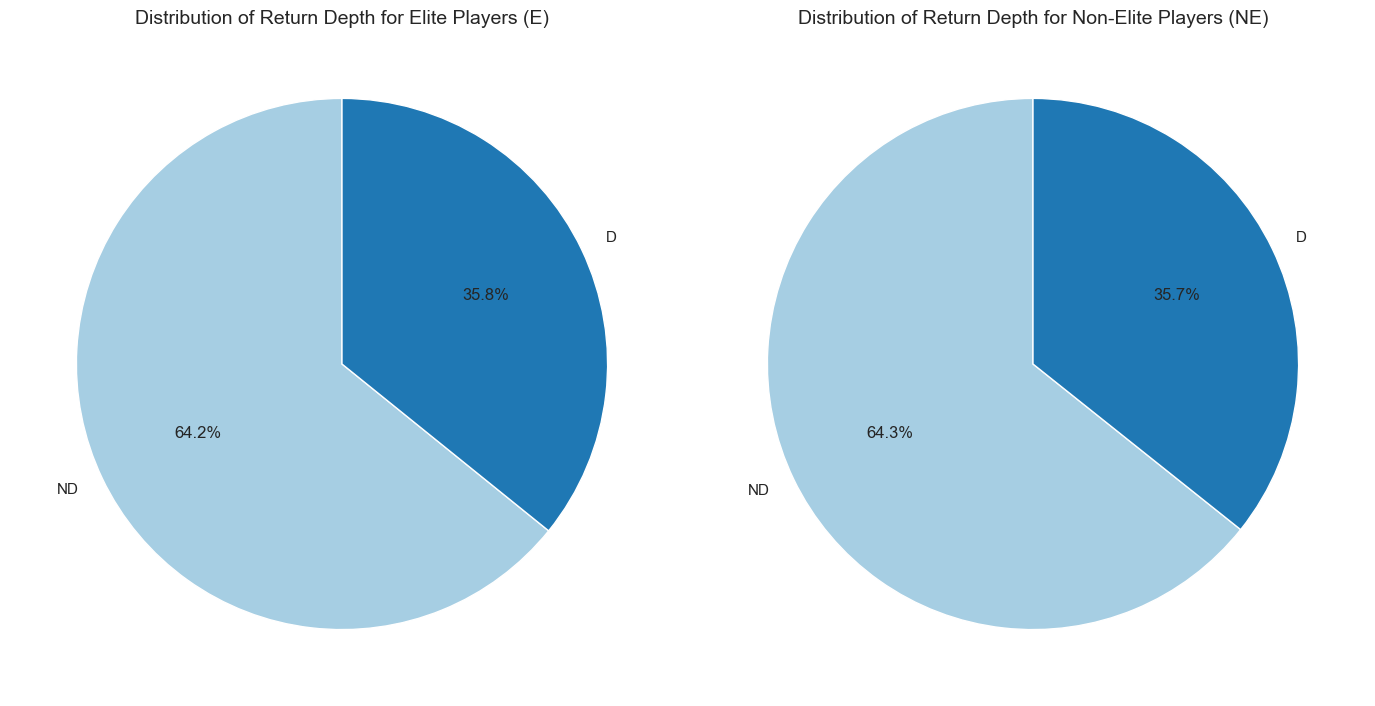

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_charts_for_return_depth(player_stats):
    # List of ReturnDepth categories
    categories = ['ND', 'D']

    # Calculating the total ReturnDepth counts divided by the number of matches played for each player
    player_stats['ND_per_match'] = player_stats['ND'] / player_stats['match_played']
    player_stats['D_per_match'] = player_stats['D'] / player_stats['match_played']

    # Grouping by rank_elite ('E' and 'NE') and calculating mean values
    group_e = player_stats[player_stats['rank_elite'] == 'E'][['ND_per_match', 'D_per_match']].mean()
    group_ne = player_stats[player_stats['rank_elite'] == 'NE'][['ND_per_match', 'D_per_match']].mean()

    # Calculate percentages for each group
    group_e_percentage = (group_e / group_e.sum()) * 100
    group_ne_percentage = (group_ne / group_ne.sum()) * 100

    # Plotting the pie chart for Elite players
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    ax[0].pie(group_e_percentage, labels=categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax[0].set_title('Distribution of Return Depth for Elite Players (E)', fontsize=14)

    # Plotting the pie chart for Non-Elite players
    ax[1].pie(group_ne_percentage, labels=categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax[1].set_title('Distribution of Return Depth for Non-Elite Players (NE)', fontsize=14)

    plt.tight_layout()
    plt.show()

# Example usage
plot_pie_charts_for_return_depth(player_stats)



This graph implies that the variations and percentage of return position does not significantly contribute to the differences in performance between elite players and non elite players

In [57]:
# Assuming '1stIn', '1stWon', and 'match_played' are existing columns in the player_stats DataFrame

# Create new columns by dividing 1stIn and 1stWon by match_played
player_stats['1stIn_per_match'] = player_stats['1stIn'] / player_stats['match_played']
player_stats['1stWon_per_match'] = player_stats['1stWon'] / player_stats['match_played']

# Display the updated DataFrame
player_stats[['player_name', '1stIn', '1stWon', 'match_played', '1stIn_per_match', '1stWon_per_match']].head()


,player_name,1stIn,1stWon,match_played,1stIn_per_match,1stWon_per_match
0,Adrian Mannarino,2227.0,1546.0,33.0,67.484848,46.848485
1,Alastair Gray,130.0,97.0,2.0,65.000000,48.500000
2,Albert Ramos Vinolas,NaN,NaN,NaN,NaN,NaN
3,Alejandro Davidovich Fokina,2954.0,1961.0,36.0,82.055556,54.472222
4,Alejandro Tabilo,575.0,411.0,7.0,82.142857,58.714286


<Figure size 1000x600 with 0 Axes>

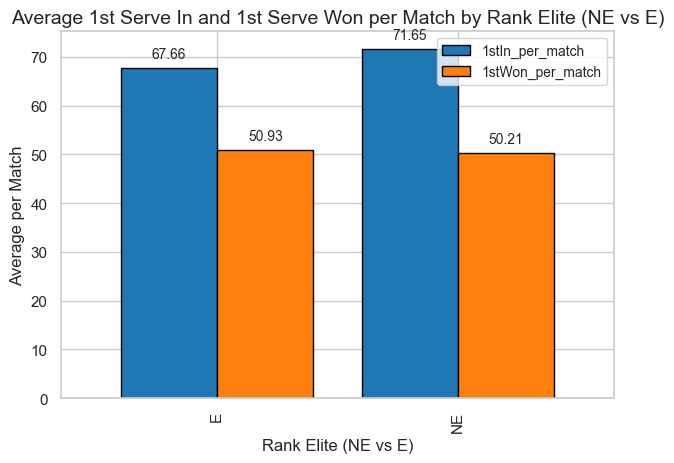

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by rank_elite and calculate the average for 1stIn_per_match and 1stWon_per_match
avg_serve_stats = player_stats.groupby('rank_elite').agg({
    '1stIn_per_match': 'mean',
    '1stWon_per_match': 'mean'
}).reset_index()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
ax = avg_serve_stats.plot(kind='bar', x='rank_elite', y=['1stIn_per_match', '1stWon_per_match'], 
                          color=['#1f77b4', '#ff7f0e'], edgecolor='black', width=0.8, legend=True)

# Add labels and title
plt.title('Average 1st Serve In and 1st Serve Won per Match by Rank Elite (NE vs E)', fontsize=14)
plt.ylabel('Average per Match', fontsize=12)
plt.xlabel('Rank Elite (NE vs E)', fontsize=12)

# Add numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Adjust the legend
plt.legend(['1stIn_per_match', '1stWon_per_match'], loc='upper right', fontsize=10)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



This implies that the elite players have a considerable average number of 1st serve in and 1st serve won compared to the non-elite players, with about 20 units for each category. Even though by percentage, 20 units is not that significant, however, during professional matches, every point matters, and 20 points are about 5 games of tennis. These 20 points only counts for 1st Serve In and 1st Serve Won, not to mention 2nd Serves, which differentiates between great players and those who are yet to be. 

In [59]:
player_stats['2ndWon_per_match'] = player_stats['2ndWon'] / player_stats['match_played']
player_stats['bpSaved_per_match'] = player_stats['bpSaved'] / player_stats['match_played']
player_stats['bpFaced_per_match'] = player_stats['bpFaced'] / player_stats['match_played']
player_stats['bpSaved%'] = player_stats['bpSaved'] / player_stats['bpFaced']



# Display the updated DataFrame
player_stats[['player_name', '1stIn', '1stWon', 'match_played', '1stIn_per_match', '1stWon_per_match',
              '2ndWon_per_match', 'bpSaved_per_match', 'bpFaced_per_match']].head()

player_stats = player_stats.dropna(thresh=player_stats.shape[1] - 5)


/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/2308800457.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='rank_elite', y='2ndWon_per_match', data=grouped_data, palette="muted")
/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/2308800457.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='rank_elite', y='bpSaved_per_match', data=grouped_data, palette="muted")
/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/2308800457.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

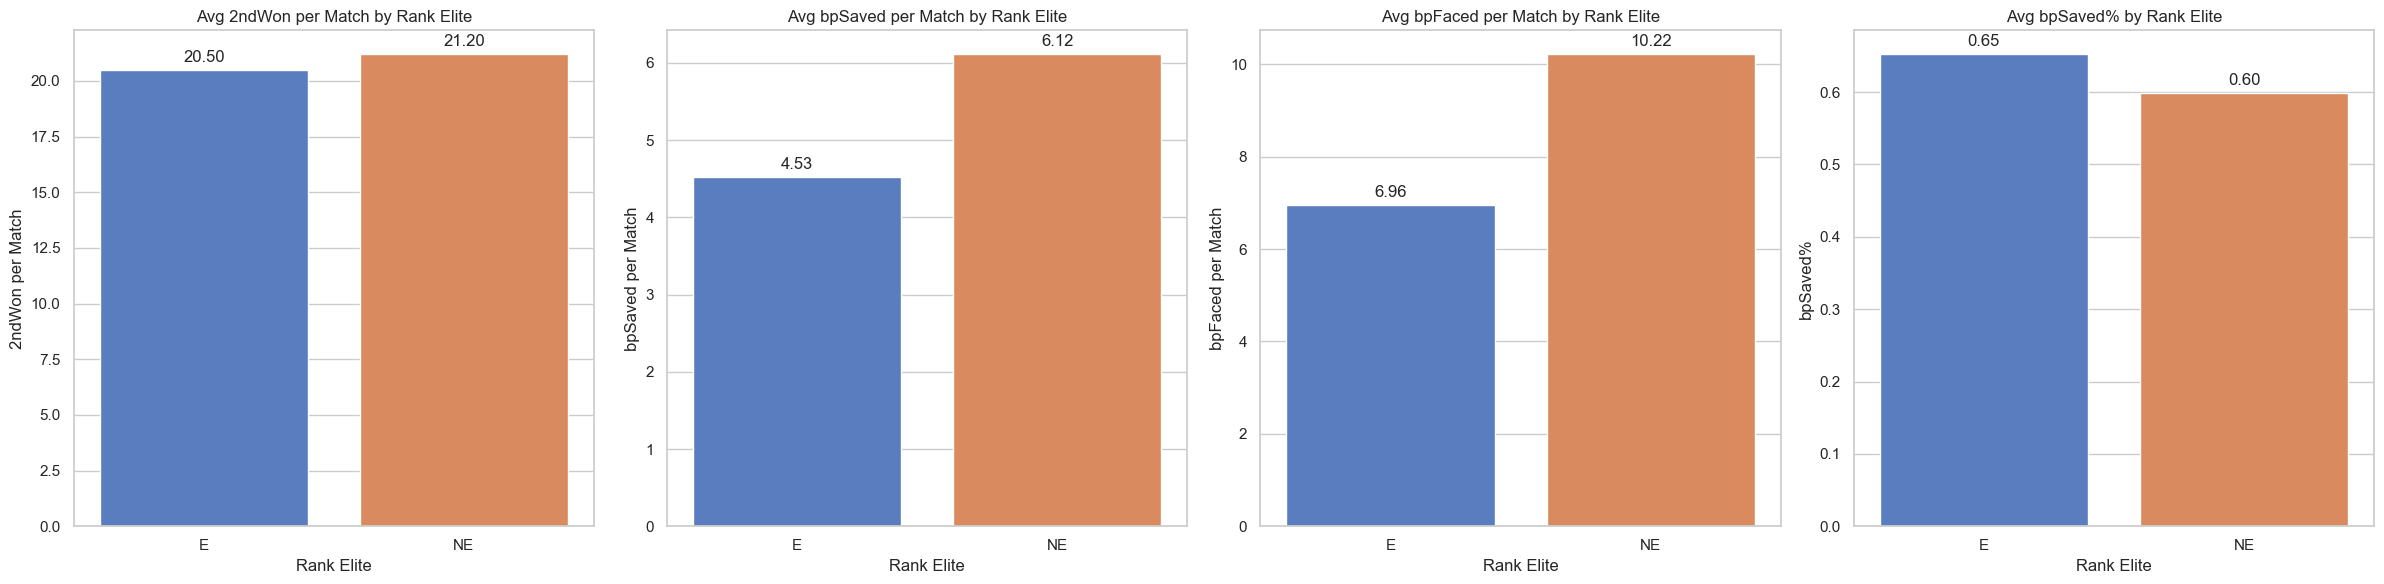

In [60]:
import seaborn as sns
# Group the data by 'rank_elite' and calculate the mean for each variable
grouped_data = player_stats.groupby('rank_elite').agg({
    '2ndWon_per_match': 'mean',
    'bpSaved_per_match': 'mean',
    'bpFaced_per_match': 'mean',
    'bpSaved%': 'mean'
}).reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure with subplots for each variable
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Plot for 2ndWon_per_match
sns.barplot(ax=axes[0], x='rank_elite', y='2ndWon_per_match', data=grouped_data, palette="muted")
axes[0].set_title('Avg 2ndWon per Match by Rank Elite')
axes[0].set_xlabel('Rank Elite')
axes[0].set_ylabel('2ndWon per Match')

# Plot for bpSaved_per_match
sns.barplot(ax=axes[1], x='rank_elite', y='bpSaved_per_match', data=grouped_data, palette="muted")
axes[1].set_title('Avg bpSaved per Match by Rank Elite')
axes[1].set_xlabel('Rank Elite')
axes[1].set_ylabel('bpSaved per Match')

# Plot for bpFaced_per_match
sns.barplot(ax=axes[2], x='rank_elite', y='bpFaced_per_match', data=grouped_data, palette="muted")
axes[2].set_title('Avg bpFaced per Match by Rank Elite')
axes[2].set_xlabel('Rank Elite')
axes[2].set_ylabel('bpFaced per Match')

# Plot for bpSaved%
sns.barplot(ax=axes[3], x='rank_elite', y='bpSaved%', data=grouped_data, palette="muted")
axes[3].set_title('Avg bpSaved% by Rank Elite')
axes[3].set_xlabel('Rank Elite')
axes[3].set_ylabel('bpSaved%')

# Add labels to the bars with the average values
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 9), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()

The graphs also imply that the elite players took the edge of number of 2nd Serve Point won per matches compared to the non-elite ones, by average of 6 points. In total for both first and second serve point, the elite players edged by 26 points, which is a significant number in professional tennis. Although they have fewer break point saved than their non-elite counterparts, it may be due to the fact that they faced considerably fewer break points than the non-elite. In terms of break point saved % (saved/faced), elite players again edged the non-elite by 6%, implying that the elites are clutcher. 

In [61]:
wimus['0-4'] = wimus['RallyCount'].apply(lambda x: 1 if 0 <= x <= 4 else 0)
wimus['5-8'] = wimus['RallyCount'].apply(lambda x: 1 if 5 <= x <= 8 else 0)
wimus['9+'] = wimus['RallyCount'].apply(lambda x: 1 if x >= 9 else 0)




In [62]:
# Create columns for wins and losses by rally categories
wimus['0-4_w'] = wimus['0-4']
wimus['5-8_w'] = wimus['5-8']
wimus['9+_w'] = wimus['9+']

wimus['0-4_l'] = wimus['0-4']
wimus['5-8_l'] = wimus['5-8']
wimus['9+_l'] = wimus['9+']

# Determine the winner's and loser's names
wimus['Point_Winner'] = wimus.apply(
    lambda row: row['player1'] if row['PointWinner'] == 1 else row['player2'], axis=1
)
wimus['Point_Loser'] = wimus.apply(
    lambda row: row['player2'] if row['PointWinner'] == 1 else row['player1'], axis=1
)

# Group by Point_Winner for wins
wins = wimus.groupby('Point_Winner')[['0-4_w', '5-8_w', '9+_w']].sum().reset_index()

# Group by Point_Loser for losses
losses = wimus.groupby('Point_Loser')[['0-4_l', '5-8_l', '9+_l']].sum().reset_index()

# Rename columns for merging clarity
wins.rename(columns={'Point_Winner': 'player_name'}, inplace=True)
losses.rename(columns={'Point_Loser': 'player_name'}, inplace=True)

# Merge wins and losses on player_name
result = pd.merge(wins, losses, on='player_name', how='outer').fillna(0)

# Filter players with at least one non-zero value in their row
result = result.loc[(result.iloc[:, 1:] != 0).all(axis=1)]

# Calculate the percentage columns

result['0-4_%'] = result['0-4_w']*100 / (result['0-4_w'] + result['0-4_l'])
result['5-8_%'] = result['5-8_w']*100 / (result['5-8_w'] + result['5-8_l'])
result['9+_%'] = result['9+_w']*100 / (result['9+_w'] + result['9+_l'])



In [63]:
# Create columns for each rally count value from 1 to 14 and one for 15+
for i in range(1, 15):
    every[f'{i}'] = every['RallyCount'].apply(lambda x: 1 if x == i else 0)

# Create a column for values greater than or equal to 15
every['15+'] = every['RallyCount'].apply(lambda x: 1 if x >= 15 else 0)


In [64]:
# Create columns for wins and losses by rally categories (1 to 15+)
for i in range(1, 15):
    every[f'{i}_w'] = every[f'{i}']
    every[f'{i}_l'] = every[f'{i}']

# Create the 15+ win and loss columns
every['15+_w'] = every['15+']
every['15+_l'] = every['15+']

# Determine the winner's and loser's names
every['Point_Winner'] = every.apply(
    lambda row: row['player1'] if row['PointWinner'] == 1 else row['player2'], axis=1
)
every['Point_Loser'] = every.apply(
    lambda row: row['player2'] if row['PointWinner'] == 1 else row['player1'], axis=1
)

# Group by Point_Winner for wins (for all categories 1 to 15+)
wins = every.groupby('Point_Winner')[['1_w', '2_w', '3_w', '4_w', '5_w', '6_w', '7_w', '8_w', '9_w', '10_w', '11_w', '12_w', '13_w', '14_w', '15+_w']].sum().reset_index()

# Group by Point_Loser for losses (for all categories 1 to 15+)
losses = every.groupby('Point_Loser')[['1_l', '2_l', '3_l', '4_l', '5_l', '6_l', '7_l', '8_l', '9_l', '10_l', '11_l', '12_l', '13_l', '14_l', '15+_l']].sum().reset_index()

# Rename columns for merging clarity
wins.rename(columns={'Point_Winner': 'player_name'}, inplace=True)
losses.rename(columns={'Point_Loser': 'player_name'}, inplace=True)

# Merge wins and losses on player_name
result1 = pd.merge(wins, losses, on='player_name', how='outer').fillna(0)
result = pd.merge(result, result1, on='player_name', how='outer').fillna(0)


# Filter players with at least one non-zero value in their row
result = result.loc[(result.iloc[:, 1:] != 0).all(axis=1)]

# Calculate the percentage columns for each range from 1 to 15+
for i in range(1, 15):
    result[f'{i}_%'] = result[f'{i}_w'] * 100 / (result[f'{i}_w'] + result[f'{i}_l'])

# Calculate the 15+ percentage
result['15+_%'] = result['15+_w'] * 100 / (result['15+_w'] + result['15+_l'])





# Merge the result DataFrame with player_stats on 'player_name'
player_stats = player_stats.merge(
    result[['player_name', '0-4_%', '5-8_%', '9+_%', 
            '1_%', '2_%', '3_%', '4_%', '5_%', '6_%', '7_%', '8_%', '9_%', '10_%', '11_%', '12_%', '13_%', '14_%', '15+_%']],
    on='player_name',
    how='left'
)

player_stats.head()


,player_name,0_0,CTL_B,CTL_BC,CTL_BW,CTL_C,CTL_W,NCTL_B,NCTL_BC,NCTL_BW,...,6_%,7_%,8_%,9_%,10_%,11_%,12_%,13_%,14_%,15+_%
0,Adrian Mannarino,45.0,27.0,50.0,27.0,87.0,315.0,116.0,276.0,316.0,...,43.478261,53.403141,34.146341,53.061224,40.277778,49.295775,39.024390,69.565217,38.095238,42.335766
1,Alastair Gray,4.0,0.0,1.0,3.0,5.0,14.0,13.0,20.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alejandro Davidovich Fokina,74.0,62.0,96.0,65.0,82.0,246.0,292.0,359.0,301.0,...,49.783550,50.471698,54.545455,53.968254,59.782609,60.714286,66.071429,47.500000,54.545455,47.872340
3,Alejandro Tabilo,28.0,8.0,28.0,20.0,29.0,106.0,37.0,71.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aleksandar Vukic,6.0,3.0,7.0,2.0,14.0,38.0,18.0,19.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Step 1: Ensure the data is clean (drop rows with missing Avg_1st_ServeSpeed or height)
player_stats_clean = player_stats.dropna(subset=['Avg_1st_ServeSpeed', 'height'])

# Step 2: Define dependent (y) and independent (X) variables
X = player_stats_clean['height']  # Independent variable (height)
y = player_stats_clean['Avg_1st_ServeSpeed']  # Dependent variable (1st Serve Speed)

# Step 3: Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Step 4: Perform linear regression
model = sm.OLS(y, X).fit()

# Step 5: Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Avg_1st_ServeSpeed   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           2.20e-22
Time:                        23:58:11   Log-Likelihood:                -594.04
No. Observations:                 211   AIC:                             1192.
Df Residuals:                     209   BIC:                             1199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.6433      7.587     13.133      0.0

## Regression Model Interpretation

This regression model suggest that an 1cm increase in height may result in a 0.3 km/h increase in average first serve speed. It shows positive correlational relationship between the players' height and their average first serve speed. However, R squared is relatively low, suggesting that this regression model's prediction is unreliable.


In [66]:
import pandas as pd

# Assuming wimus is your DataFrame
# Step 1: Group by 'match_id' and take the last row for each group
last_points_per_match = wimus.groupby('match_id').last().reset_index()

# Step 2: Calculate the deficits for player1 and player2
last_points_per_match['P1Deficit'] = last_points_per_match['P1PointsWon'] - last_points_per_match['P2PointsWon']
last_points_per_match['P2Deficit'] = last_points_per_match['P2PointsWon'] - last_points_per_match['P1PointsWon']

# Step 3: Create the deficit dataset with the necessary columns
deficit = last_points_per_match[['match_id', 'player1', 'player2', 'P1PointsWon', 'P2PointsWon', 'P1Deficit', 'P2Deficit']]

# Display the first few rows of the resulting deficit dataset
deficit.head()

,match_id,player1,player2,P1PointsWon,P2PointsWon,P1Deficit,P2Deficit
0,2019-usopen-1101,Novak Djokovic,Roberto Carballes Baena,94,70,24,-24
1,2019-usopen-1102,Sam Querrey,Juan Ignacio Londero,107,127,-20,20
2,2019-usopen-1105,Stan Wawrinka,Jannik Sinner,142,128,14,-14
3,2019-usopen-1108,Zachary Svajda,Paolo Lorenzi,166,181,-15,15
4,2019-usopen-1111,Tomas Berdych,Jenson Brooksby,96,113,-17,17


In [67]:
# Step 1: Sum P1Deficit for player1 and P2Deficit for player2, then combine them
player1_deficit = deficit.groupby('player1')['P1Deficit'].sum().rename('total_deficit')
player2_deficit = deficit.groupby('player2')['P2Deficit'].sum().rename('total_deficit')

# Combine the two deficit series, summing them where players appear in both columns
total_def = player1_deficit.add(player2_deficit, fill_value=0).reset_index()

# Rename the 'index' column to 'player_name' for clarity
total_def = total_def.rename(columns={'index': 'player_name'})

# Ensure the resulting dataset has player_name and their total_deficit
total_def.head()


,player_name,total_deficit
0,Adrian Mannarino,-59.0
1,Alastair Gray,23.0
2,Albert Ramos Vinolas,-177.0
3,Alejandro Davidovich Fokina,69.0
4,Alejandro Tabilo,13.0


In [68]:
# Step 1: Calculate total deficits by player across both `player1` and `player2`
# Aggregate P1Deficit for player1 and P2Deficit for player2, then combine them
player1_deficit = deficit.groupby('player1')['P1Deficit'].sum().rename('total_deficit')
player2_deficit = deficit.groupby('player2')['P2Deficit'].sum().rename('total_deficit')

# Combine the deficits from both player1 and player2 perspectives
combined_deficit = player1_deficit.add(player2_deficit, fill_value=0).reset_index()
combined_deficit = combined_deficit.rename(columns={'index': 'player_name'})

# Step 2: Merge the combined deficit data into the player_stats dataset
# Ensure player_name column in player_stats if it was an index
player_stats = player_stats.reset_index() if 'player_name' not in player_stats.columns else player_stats

# Merge the combined deficit data on player_name
player_stats = player_stats.merge(combined_deficit, on='player_name', how='left')

# Fill any NaN values with 0 (in case some players have no deficit data)
player_stats['total_deficit'] = player_stats['total_deficit'].fillna(0)

# Confirm the new total_deficit column in player_stats
player_stats.head()

#principal components analysis
#

,player_name,0_0,CTL_B,CTL_BC,CTL_BW,CTL_C,CTL_W,NCTL_B,NCTL_BC,NCTL_BW,...,7_%,8_%,9_%,10_%,11_%,12_%,13_%,14_%,15+_%,total_deficit
0,Adrian Mannarino,45.0,27.0,50.0,27.0,87.0,315.0,116.0,276.0,316.0,...,53.403141,34.146341,53.061224,40.277778,49.295775,39.024390,69.565217,38.095238,42.335766,-59.0
1,Alastair Gray,4.0,0.0,1.0,3.0,5.0,14.0,13.0,20.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
2,Alejandro Davidovich Fokina,74.0,62.0,96.0,65.0,82.0,246.0,292.0,359.0,301.0,...,50.471698,54.545455,53.968254,59.782609,60.714286,66.071429,47.500000,54.545455,47.872340,69.0
3,Alejandro Tabilo,28.0,8.0,28.0,20.0,29.0,106.0,37.0,71.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
4,Aleksandar Vukic,6.0,3.0,7.0,2.0,14.0,38.0,18.0,19.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.0


In [69]:
player_stats['avg_deficit'] = player_stats['total_deficit'] / player_stats['match_played']

player_stats.head()

,player_name,0_0,CTL_B,CTL_BC,CTL_BW,CTL_C,CTL_W,NCTL_B,NCTL_BC,NCTL_BW,...,8_%,9_%,10_%,11_%,12_%,13_%,14_%,15+_%,total_deficit,avg_deficit
0,Adrian Mannarino,45.0,27.0,50.0,27.0,87.0,315.0,116.0,276.0,316.0,...,34.146341,53.061224,40.277778,49.295775,39.024390,69.565217,38.095238,42.335766,-59.0,-1.787879
1,Alastair Gray,4.0,0.0,1.0,3.0,5.0,14.0,13.0,20.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,11.500000
2,Alejandro Davidovich Fokina,74.0,62.0,96.0,65.0,82.0,246.0,292.0,359.0,301.0,...,54.545455,53.968254,59.782609,60.714286,66.071429,47.500000,54.545455,47.872340,69.0,1.916667
3,Alejandro Tabilo,28.0,8.0,28.0,20.0,29.0,106.0,37.0,71.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,1.857143
4,Aleksandar Vukic,6.0,3.0,7.0,2.0,14.0,38.0,18.0,19.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.0,-1.750000


In [70]:
player_stats['elite_numeric'] = player_stats['rank_elite'].map({'E': 1, 'NE': 0})
player_stats.drop(columns=['rank_elite'], inplace=True)

# # Calculate median of avg_deficit
# threshold = player_stats['avg_deficit'].median()

# # Create binary target based on threshold (1 if above median, 0 if below or equal)
# player_stats['avg_deficit_binary'] = (player_stats['avg_deficit'] > threshold).astype(int)

# # Re-define y and X using the binary target
# filtered_data = player_stats[['avg_deficit_binary', 'elite_numeric', 'Avg_1st_ServeSpeed']].replace([np.inf, -np.inf], np.nan).dropna()
# y = filtered_data['avg_deficit_binary']
# X = filtered_data[['elite_numeric', 'Avg_1st_ServeSpeed']]
# X['elite_serve_interaction'] = X['elite_numeric'] * X['Avg_1st_ServeSpeed']

# # Add constant
# X = sm.add_constant(X)

# # Fit logistic regression
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()

# # Display results
# print(result.summary())



## Regression Model Interpretation
The regression suggests that the number of 1st Serve In or 1st Serve Won has limited impact to the change in average deficit of the matches, while the fact a player is an elite or non-elite played a significant impact, as if one is an elite, they may earn more than 10 points compared to non-elite counterparts on average. Regarding the factor 1st Serve In multiplies with 1st Serve Won, it has little to no relationship with average deficit points per match. 

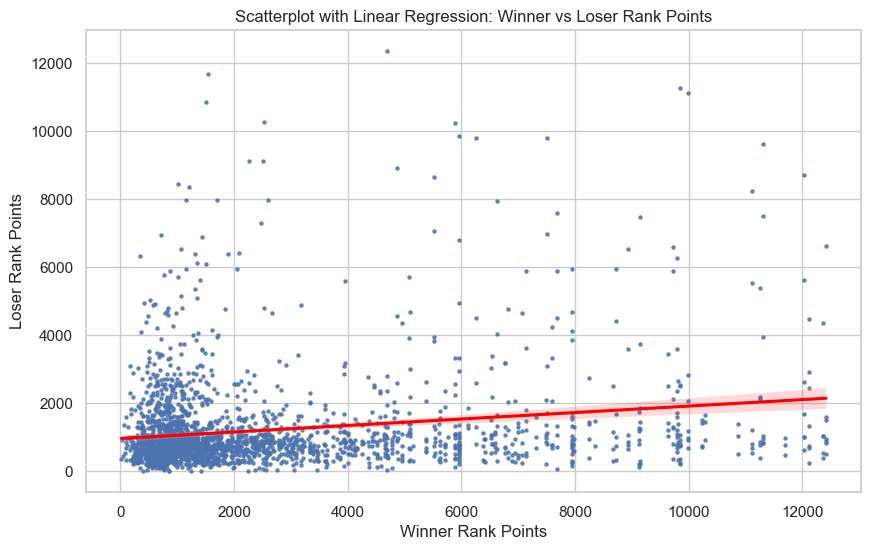

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='winner_rank_points', y='loser_rank_points', data=gs, scatter_kws={'s': 5}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Winner Rank Points')
plt.ylabel('Loser Rank Points')
plt.title('Scatterplot with Linear Regression: Winner vs Loser Rank Points')

# Show plot
plt.show()


## Linear Regression Model Interpretation

The linear regression suggests that the majority of data points is located below median of both variables, which means most matches are played between players with points below median.There is a wide spread of loser rank points for any given winner rank point, indicating variability in the rank points of losers. Some matches involve losers with very high rank points, which are outliers compared to the general trend.


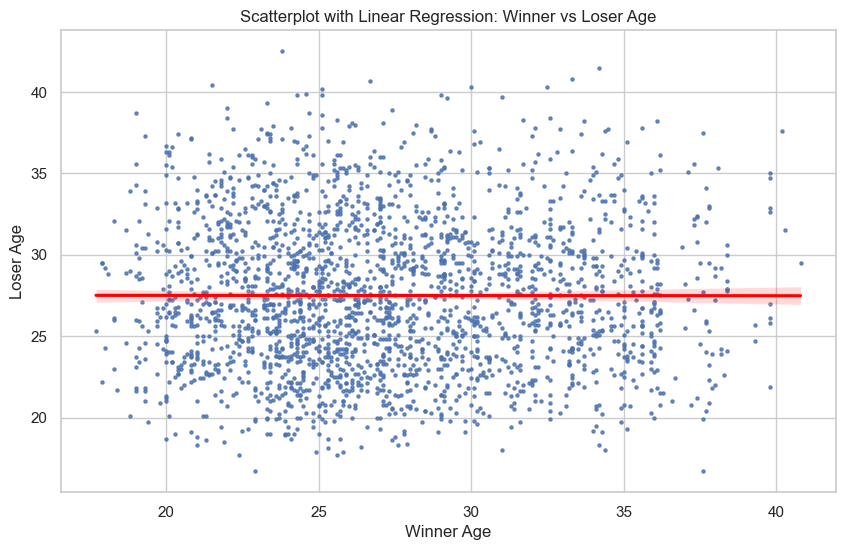

In [72]:
# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='winner_age', y='loser_age', data=gs, scatter_kws={'s': 5}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Winner Age')
plt.ylabel('Loser Age')
plt.title('Scatterplot with Linear Regression: Winner vs Loser Age')

# Show plot
plt.show()

## Linear Regression Model Interpretation

It suggests that the difference in ranking points has little to no relationship in determining the winner or loser of a Grand Slam match, and the same argument applies to the age differences. 




In [73]:
# Assuming player_stats has already been defined with Forehand_Winners, Backhand_Winners, and match_played

# Create avg_Forehand and avg_Backhand columns
player_stats['avg_Forehand'] = player_stats['Forehand_Winners'] / player_stats['match_played']
player_stats['avg_Backhand'] = player_stats['Backhand_Winners'] / player_stats['match_played']


In [74]:
import statsmodels.api as sm

# Prepare the data by removing any rows with NaN in avg_Forehand or avg_Backhand
regression_data = player_stats[['elite_numeric', 'Forehand_Winners', 'Backhand_Winners']].dropna()

# Set up the independent variables (with constant for intercept) and dependent variable
X = regression_data[['Forehand_Winners', 'Backhand_Winners']]
X = sm.add_constant(X)  # Add intercept
y = regression_data['elite_numeric']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Display the results
print(logit_result.summary())



Optimization terminated successfully.
         Current function value: 0.093768
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          elite_numeric   No. Observations:                  219
Model:                          Logit   Df Residuals:                      216
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.5585
Time:                        23:58:11   Log-Likelihood:                -20.535
converged:                       True   LL-Null:                       -46.515
Covariance Type:            nonrobust   LLR p-value:                 5.213e-12
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.9560      1.193     -5.831      0.000      -9.294      -4.618
Forehand_Wi

In [75]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for elite_numeric, dropping NaN values for specific columns
regression_data_elite = player_stats.dropna(subset=[
    'Avg_1st_ServeSpeed', 'Avg_2nd_ServeSpeed', 'match_played',
    'height', 'ace', 'df', 'svpt', 'rank',
    'rank_points', 'ND_per_match', 'D_per_match', '1stIn_per_match',
    '1stWon_per_match', '2ndWon_per_match', 'bpSaved_per_match',
    'bpFaced_per_match', 'avg_deficit',
 'avg_Forehand', 'avg_Backhand', 'elite_numeric', 
])

# Check for constant variables
constant_columns = regression_data_elite.columns[
    regression_data_elite.nunique() <= 1
]
print("Constant columns that should be removed:", constant_columns)

# Remove constant variables
X_elite = regression_data_elite.drop(columns=constant_columns)[[
    'Avg_1st_ServeSpeed', 'Avg_2nd_ServeSpeed', 'match_played',
    'height', 'ace', 'df', 'svpt',
    '1stIn', '1stWon', '2ndWon', 'rank',
    'rank_points', 'ND_per_match', 'D_per_match', '1stIn_per_match',
    '1stWon_per_match', '2ndWon_per_match', 'bpSaved_per_match',
    'bpFaced_per_match', 'avg_deficit',
     'avg_Forehand', 'avg_Backhand', 'elite_numeric'
]]

# Check for multicollinearity
correlation_matrix = X_elite.corr()
print("Correlation matrix:")
print(correlation_matrix.head())

# Identify and drop highly correlated variables
threshold = 0.9  # Set a threshold for high correlation
to_drop = set()

# Loop through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # If the correlation is high
            colname = correlation_matrix.columns[i]  # Get the column name
            to_drop.add(colname)  # Mark for dropping

print("Dropping highly correlated columns:", to_drop)
X_elite = X_elite.drop(columns=to_drop)

# Add intercept
X_elite = sm.add_constant(X_elite)
y_elite = regression_data_elite['avg_deficit']




Constant columns that should be removed: Index([], dtype='object')
Correlation matrix:
                    Avg_1st_ServeSpeed  Avg_2nd_ServeSpeed  match_played  \
Avg_1st_ServeSpeed            1.000000            0.695569      0.189352   
Avg_2nd_ServeSpeed            0.695569            1.000000      0.116162   
match_played                  0.189352            0.116162      1.000000   
height                        0.604203            0.509931      0.145028   
ace                           0.508995            0.391165      0.813474   

                      height       ace        df      svpt     1stIn  \
Avg_1st_ServeSpeed  0.604203  0.508995  0.260912  0.194475  0.183343   
Avg_2nd_ServeSpeed  0.509931  0.391165  0.240529  0.121658  0.118984   
match_played        0.145028  0.813474  0.849187  0.993257  0.991936   
height              1.000000  0.505044  0.245800  0.160433  0.159869   
ace                 0.505044  1.000000  0.793115  0.823370  0.817906   

                      1

In [76]:
player_stats['avg_deficit'].head()

0    -1.787879
1    11.500000
2     1.916667
3     1.857143
4    -1.750000
Name: avg_deficit, dtype: float64

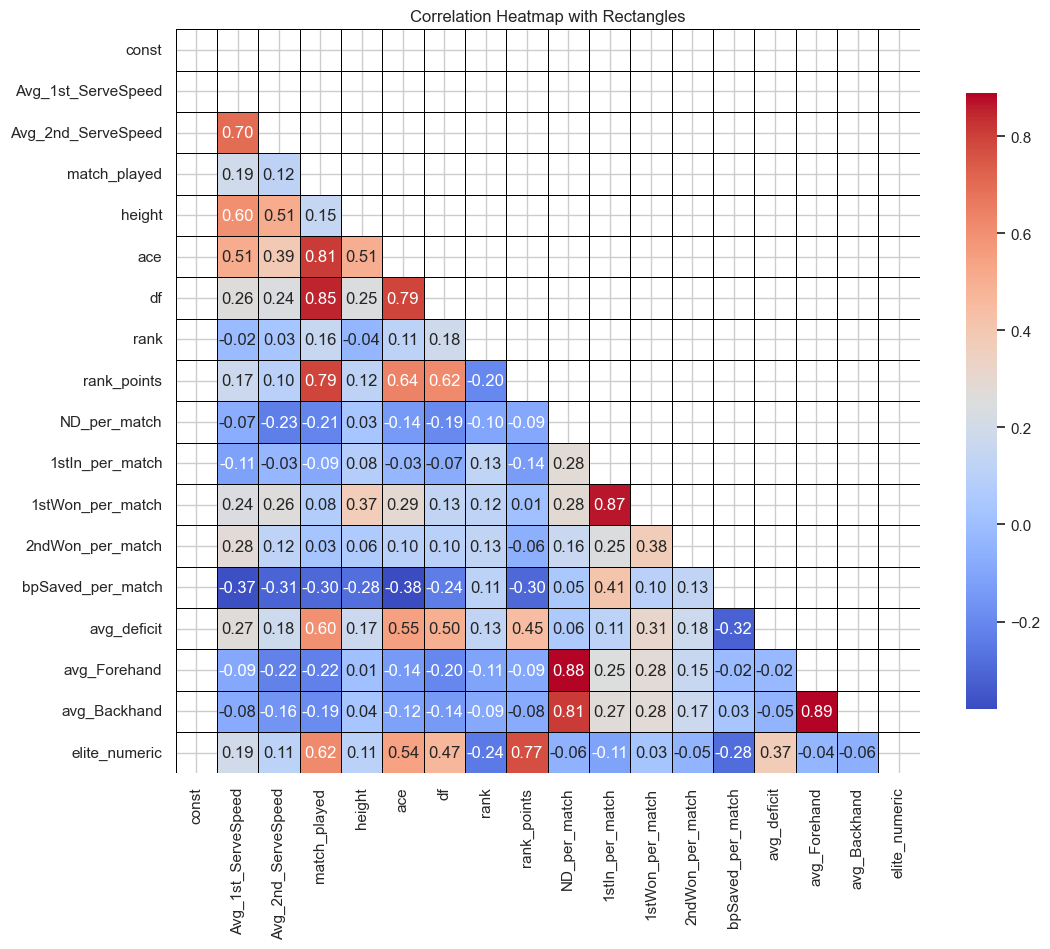

In [77]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(X_elite.corr(), dtype=bool))
sns.heatmap(X_elite.corr(), mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, linecolor='black')

plt.title('Correlation Heatmap with Rectangles')
plt.show()


## Key Observations:
Avg_1st_ServeSpeed and Avg_2nd_ServeSpeed have a moderate positive correlation (0.70). As the average speed of a player's first serve increases, the average speed of their second serve also tends to increase. 
 player fixed effect. for a specific person, difference of 1st and 2nd serve. (slow server and fast server), same correlation 

Ace and df (double faults) have a strong positive correlation (0.78), suggesting players who serve more aces also tend to have more double faults.

Rank and rank_points have a moderate negative correlation (-0.26), indicating that higher-ranked players tend to have more rank points.

Avg_Backhand and Avg_Forehand also have a moderate positive correlation, suggesting that players with good forehand tends to also have a good backhand and vice versa, thus produce more winners o

Match_played and rank_points have strong positive correlation (0.71), indicating that the more matches a player plays in a Grand Slam, the more likely they have higher ranking points. It is true in most cases, considering elite players or great players will play more matches than others, which help them accumulate more ranking points than the others.

Breakpoint saved per match and 1st In per match have the strongest positive correlation (0.88), suggesting that the better the first serve is, the more break points players can save. It is a solid case, as in a tennis game, players always rely on their serves to perform well in their service games.

Elite_numeric and ranking points have strong positive correlation (0.77) as the elite players are mostly top players who earn higher ranking points that others.

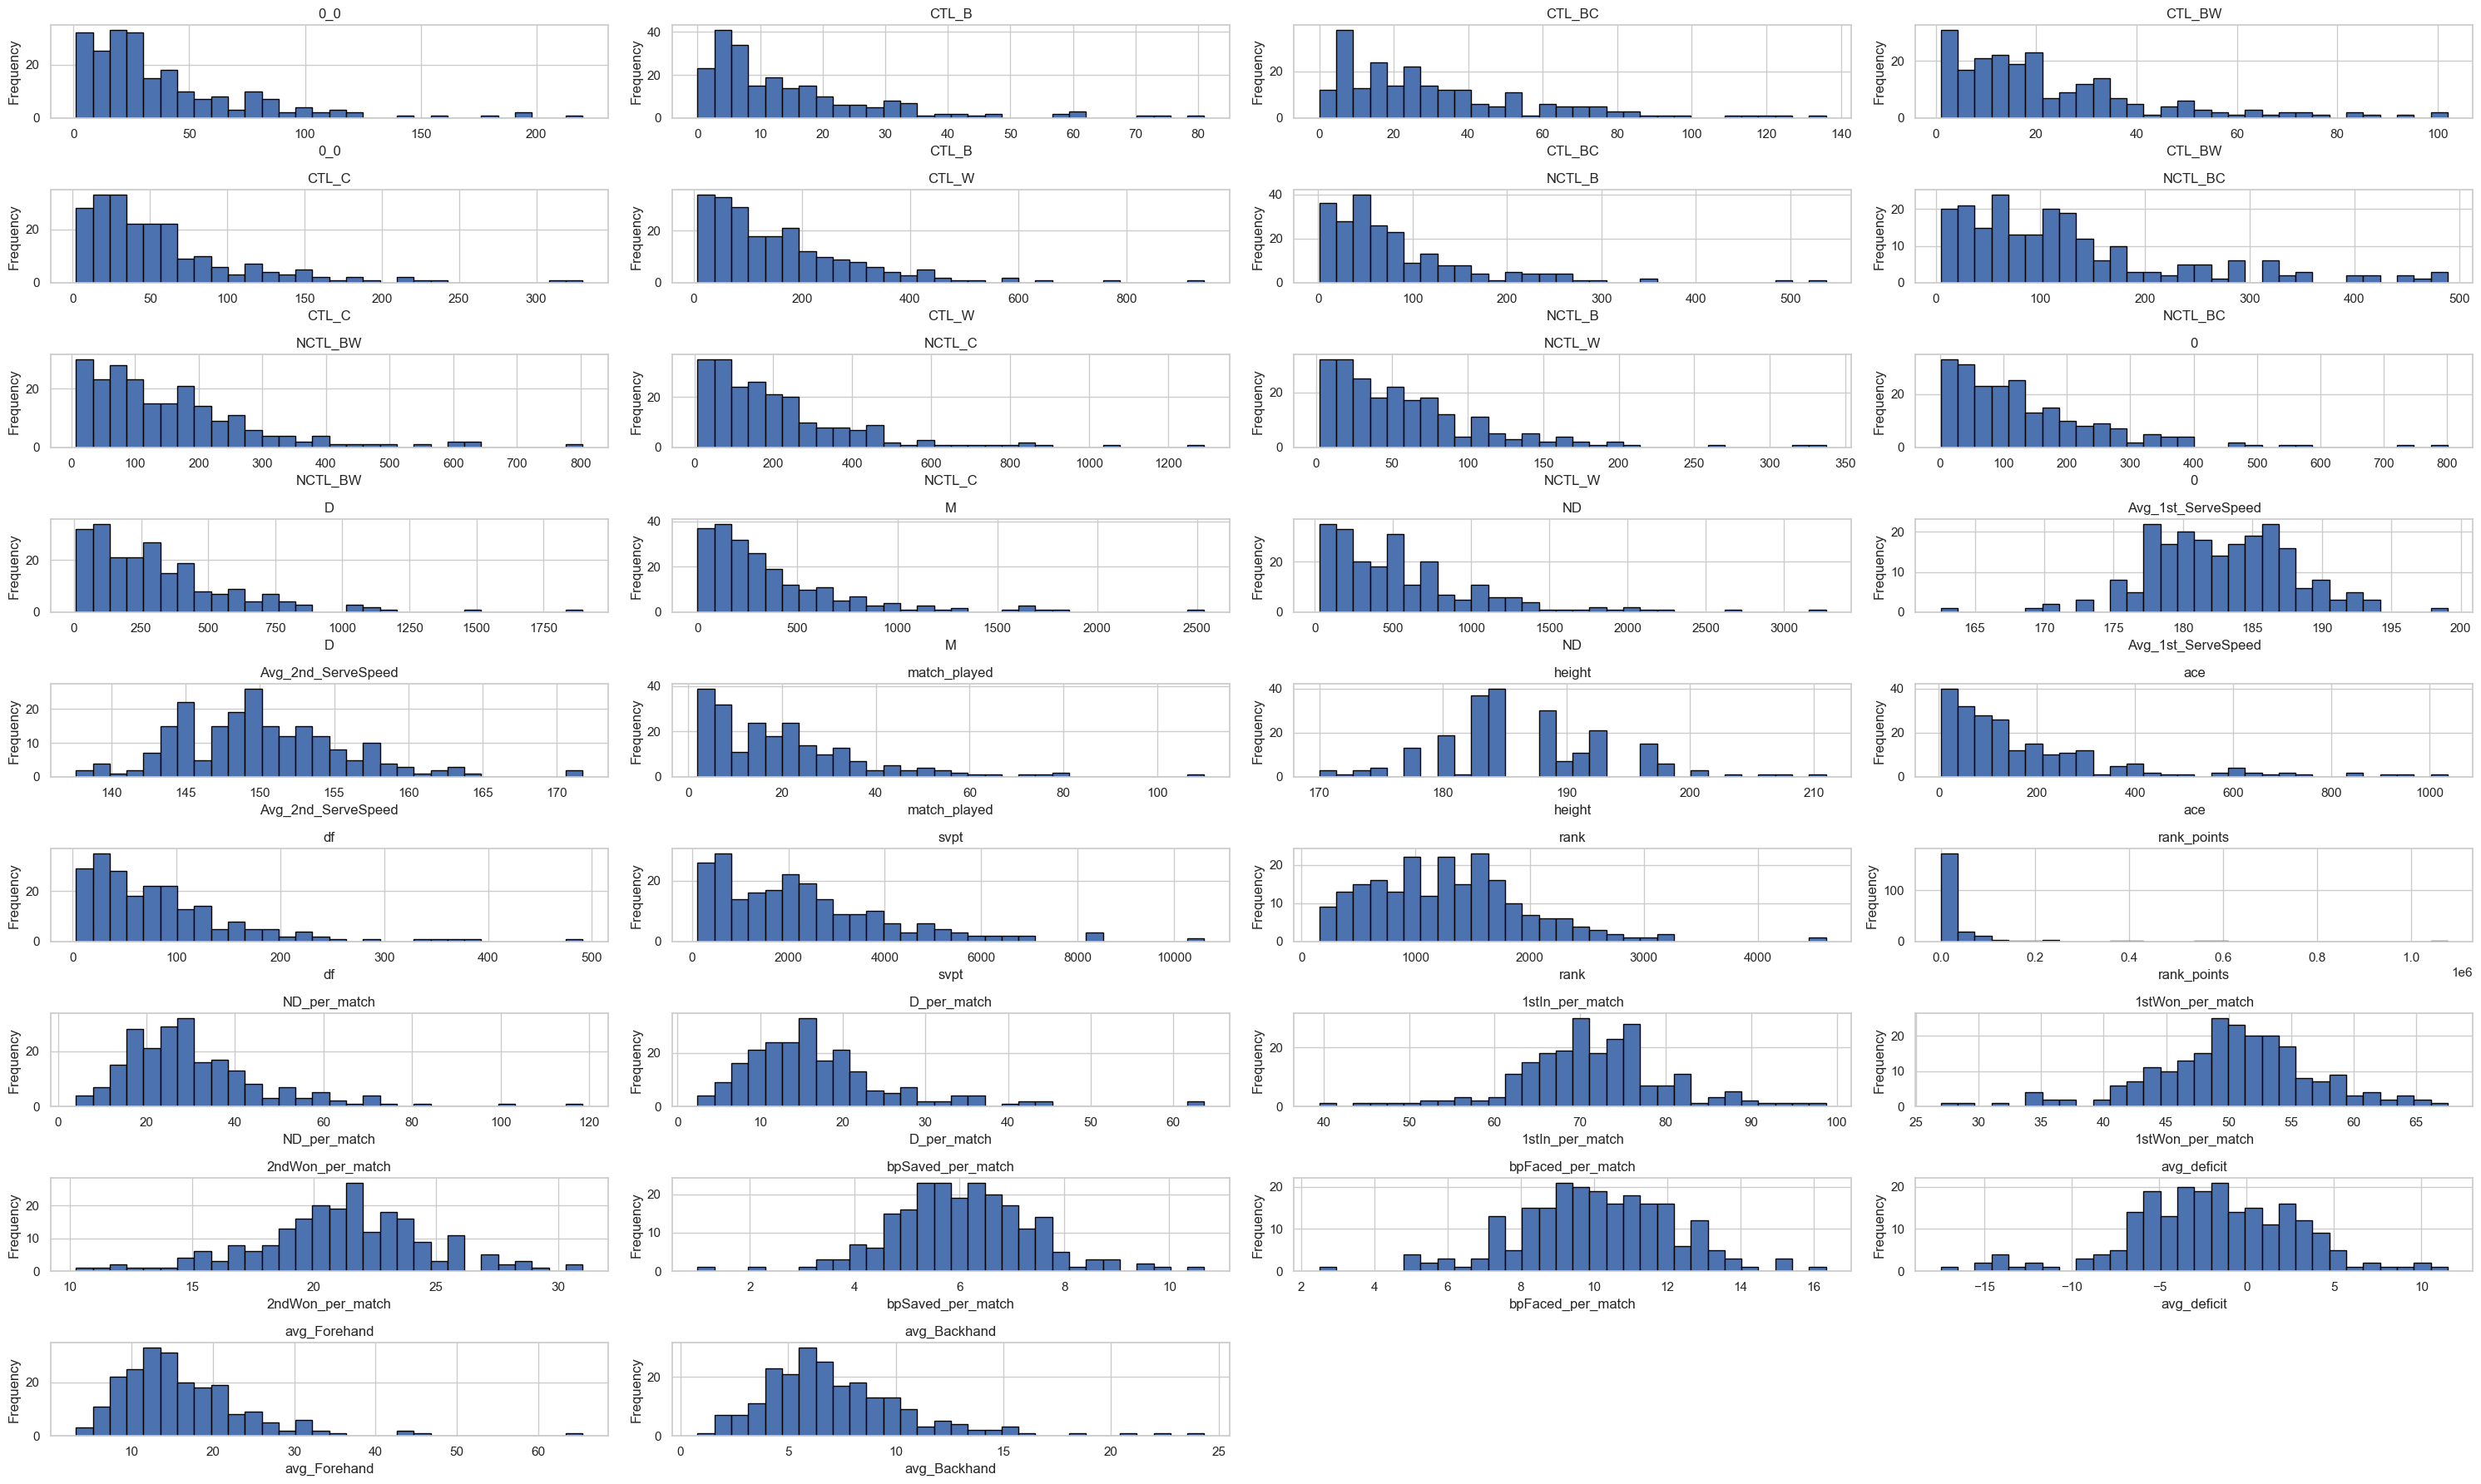

In [78]:
# New list of dimensions for histograms
dimensions = [
    '0_0', 'CTL_B', 'CTL_BC', 'CTL_BW', 'CTL_C', 'CTL_W',
    'NCTL_B', 'NCTL_BC', 'NCTL_BW', 'NCTL_C', 'NCTL_W', '0', 'D', 'M', 'ND',
    'Avg_1st_ServeSpeed', 'Avg_2nd_ServeSpeed', 'match_played',
    'height', 'ace', 'df', 'svpt', 'rank',
    'rank_points', 'ND_per_match', 'D_per_match', '1stIn_per_match',
    '1stWon_per_match', '2ndWon_per_match', 'bpSaved_per_match',
    'bpFaced_per_match', 'avg_deficit',
    'avg_Forehand', 'avg_Backhand'
]

plt.figure(1, figsize=(30, 18))

# Adjust the number of subplots based on the number of dimensions
num_dimensions = len(dimensions)
rows = num_dimensions // 4 + (num_dimensions % 4 > 0)  # Calculate number of rows needed

for i in range(num_dimensions):
    plt.subplot(rows, 4, i + 1)
    player_stats[dimensions[i]].plot(kind='hist', title=dimensions[i], bins=30, edgecolor='black')
    plt.xlabel(dimensions[i])  # Add x-label for clarity
    plt.ylabel('Frequency')  # Add y-label for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [79]:
# Save as Excel
#player_stats.to_excel('player_stats.xlsx', index=False, engine='openpyxl')


In [80]:
player_stats['Deep_Return%'] = player_stats['D']*100/(player_stats['D']+player_stats['ND'])


In [81]:
# Calculate averages
player_stats['avg_ace'] = player_stats['ace'] / player_stats['match_played']
player_stats['avg_df'] = player_stats['df'] / player_stats['match_played']


In [82]:
wimus.columns

Index(['match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon', 'P2GamesWon',
       'SetWinner', 'GameNo', 'GameWinner', 'PointNumber', 'PointWinner',
       'PointServer', 'Speed_KMH', 'P1Score', 'P2Score', 'P1Momentum',
       'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1Ace', 'P2Ace',
       'P1Winner', 'P2Winner', 'P1DoubleFault', 'P2DoubleFault', 'P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint', 'P1BreakPointWon',
       'P2BreakPointWon', 'History', 'Speed_MPH', 'P1BreakPointMissed',
       'P2BreakPointMissed', 'ServeIndicator', 'ServeNumber', 'WinnerType',
       'WinnerShotType', 'P1DistanceRun', 'P2DistanceRun', 'RallyCount',
       'ServeWidth', 'ServeDepth', 'ReturnDepth', 'player1', 'player2',
       'Returned', 'DoubleFault', '0-4', '5-8', '9+', '0-4_w', '5-8_w', '9+_w',
       '0-4_l', '5-8_l', '9+_l', 'Point_Winner', 'Point_Loser'],
      dtype='object')

## Analyze the Serve/Return patterns of each player

In [83]:
import pandas as pd

# Assuming your original dataset is called df
selected_columns = [
    'match_id','SetNo', 'P1GamesWon', 'P2GamesWon', 'SetWinner', 'GameNo', 'GameWinner',
    'PointNumber', 'PointWinner', 'PointServer', 'Speed_KMH', 'P1Score',
    'P2Score', 'P1Ace', 'P2Ace', 'P1DoubleFault', 'P2DoubleFault','P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon',
    'ServeWidth', 'ServeDepth', 'ReturnDepth', 'player1', 'player2', 'P1BreakPoint', 'P2BreakPoint'
    ,'P1BreakPointWon', 'P2BreakPointWon','Point_Winner', 'Point_Loser'
]

# Creating a new DataFrame with the selected columns
pat = every[selected_columns]



In [84]:
pat = pat.copy()

# Calculate Score column based on PointServer
pat['ScoreConcat'] = pat.apply(
    lambda row: f"{row['P1Score']}-{row['P2Score']}" if row['PointServer'] == 1 
                else f"{row['P2Score']}-{row['P1Score']}", axis=1
)

# Calculate Games column based on PointServer
pat['GameConcat'] = pat.apply(
    lambda row: f"{row['P1GamesWon']}-{row['P2GamesWon']}" if row['PointServer'] == 1 
                else f"{row['P2GamesWon']}-{row['P1GamesWon']}", axis=1
)



In [85]:
# Shift the ScoreConcat and GameConcat columns by 1 to assign previous row values
pat['Score'] = pat['ScoreConcat'].shift(1)
pat['Games'] = pat['GameConcat'].shift(1) if 'GameConcat' in pat.columns else None

# Handle rows where PointNumber starts with "0X"
# Assuming PointNumber is stored as a string
pat.loc[pat['PointNumber'].astype(str).str.startswith('0X'), ['Score', 'Games']] = pat.loc[
    pat['PointNumber'].astype(str).str.startswith('0X'), ['ScoreConcat', 'GameConcat']
].values

# Copy values from the previous row for the last row in Score and Game
pat.iloc[-1, pat.columns.get_loc('Score')] = pat.iloc[-2]['ScoreConcat']


In [86]:
# Create player1_e and player2_e columns
top_players = [
    'Alexander Zverev', 'Andrey Rublev', 'Carlos Alcaraz', 'Casper Ruud',
    'Daniil Medvedev', 'Dominic Thiem', 'Felix Auger Aliassime',
    'Matteo Berrettini', 'Novak Djokovic', 'Rafael Nadal',
    'Roger Federer', 'Stefanos Tsitsipas', 'Taylor Fritz', 'Jannik Sinner'
]

pat['player1_e'] = pat['player1'].apply(lambda x: 1 if x in top_players else 0)
pat['player2_e'] = pat['player2'].apply(lambda x: 1 if x in top_players else 0)


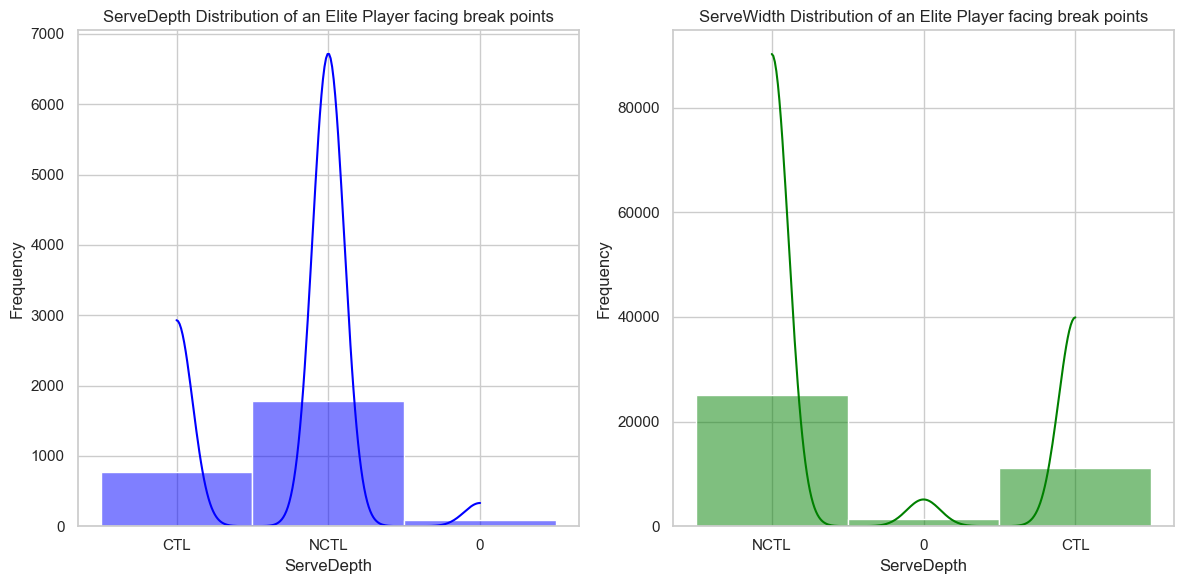

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering data based on the conditions
filtered_pat = pat[
    ((pat['player1_e'] == 1) & (pat['PointServer'] == 1) & (pat['P2BreakPoint'] == 1)) |
    ((pat['player2_e'] == 1) & (pat['PointServer'] == 2) & (pat['P1BreakPoint'] == 1))
]
filtered_pat1 = pat[
    ((pat['player1_e'] == 1) & (pat['PointServer'] == 1) & (pat['P2BreakPoint'] == 0)) |
    ((pat['player2_e'] == 1) & (pat['PointServer'] == 2) & (pat['P1BreakPoint'] == 0))
]

# Plotting ServeDepth and ServeWidth distributions
plt.figure(figsize=(12, 6))

# ServeDepth distribution
plt.subplot(1, 2, 1)
sns.histplot(filtered_pat['ServeDepth'], kde=True, bins=10, color='blue')
plt.title('ServeDepth Distribution of an Elite Player facing break points')
plt.xlabel('ServeDepth')
plt.ylabel('Frequency')

# ServeWidth distribution
plt.subplot(1, 2, 2)
sns.histplot(filtered_pat1['ServeDepth'], kde=True, bins=10, color='green')
plt.title('ServeWidth Distribution of an Elite Player facing break points')
plt.xlabel('ServeDepth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


We observe that the most frequent type of serve that is displayed during the match is Not Close to the Line, followed by the Close to the Line and then 0 (double fault). This is understandable, considering most players would not risk making a double fault by serving close to the line, especially in their second serves. Thus, the frequency of a Not Close to the Line serve occurs most among three ServeDepth types. 

This pattern applies to both Elite players and Non-elite players

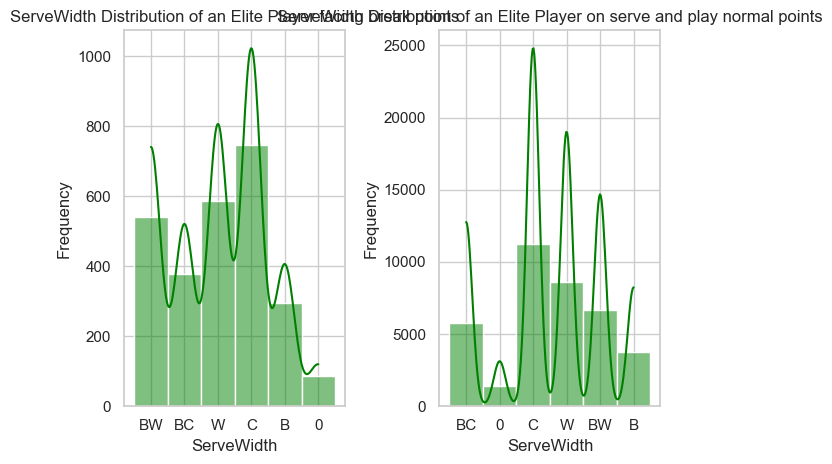

In [88]:
# ServeWidth distribution
plt.subplot(1, 2, 1)
sns.histplot(filtered_pat['ServeWidth'], kde=True, bins=10, color='green')
plt.title('ServeWidth Distribution of an Elite Player facing break points')
plt.xlabel('ServeWidth')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(filtered_pat1['ServeWidth'], kde=True, bins=20, color='green')
plt.title('ServeWidth Distribution of an Elite Player on serve and play normal points')
plt.xlabel('ServeWidth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We observe that the most frequent type of serve that is displayed during the match is the Center (C) and Wide (W). This is also understandable considering the rule of tennis allows players to serve twice for each point (1st serve and 2nd serve). According to the graph, Center and Wide serves are two most selected serve positions, due to the fact that these two serves are the hardest to return, and will give the servers the most advantages during their service games. We already observed from the previous regression model (about serve position) that Center and Wide serves contribute to more points than other serves. 


This pattern applies to both Elite and Non-elite players

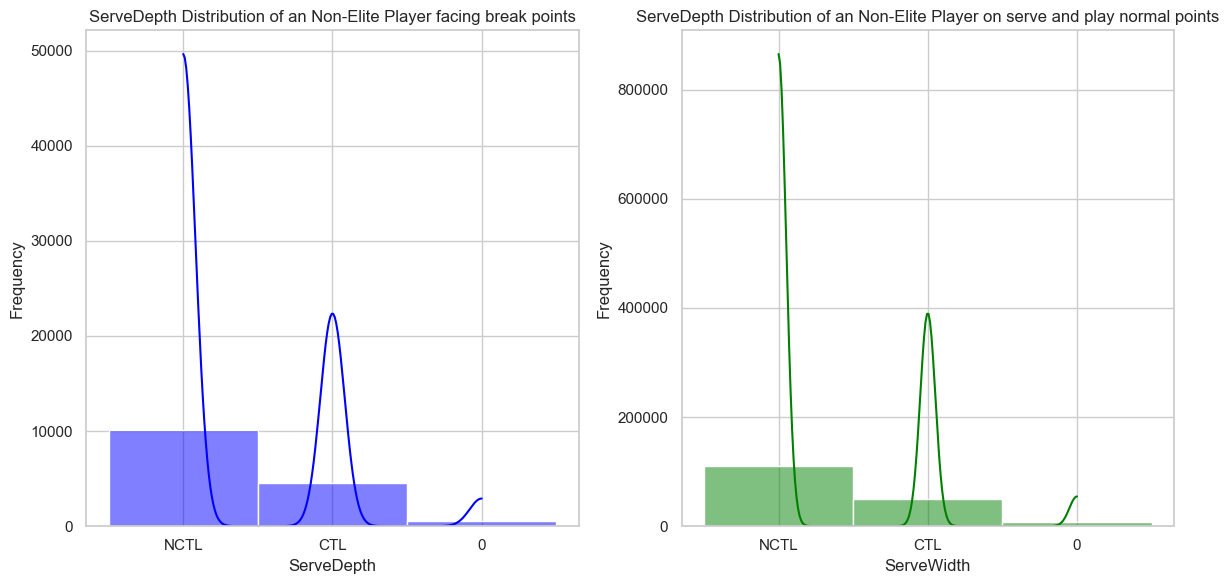

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering data based on the conditions
filtered_pat2 = pat[
    ((pat['player1_e'] == 0) & (pat['PointServer'] == 1) & (pat['P2BreakPoint'] == 1)) |
    ((pat['player2_e'] == 0) & (pat['PointServer'] == 2) & (pat['P1BreakPoint'] == 1))
]

filtered_pat3 = pat[
    ((pat['player1_e'] == 0) & (pat['PointServer'] == 1) & (pat['P2BreakPoint'] == 0)) |
    ((pat['player2_e'] == 0) & (pat['PointServer'] == 2) & (pat['P1BreakPoint'] == 0))
]


# Plotting ServeDepth and ServeWidth distributions
plt.figure(figsize=(12, 6))

# ServeDepth distribution
plt.subplot(1, 2, 1)
sns.histplot(filtered_pat2['ServeDepth'], kde=True, bins=10, color='blue')
plt.title('ServeDepth Distribution of an Non-Elite Player facing break points')
plt.xlabel('ServeDepth')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(filtered_pat3['ServeDepth'], kde=True, bins=10, color='green')
plt.title('ServeDepth Distribution of an Non-Elite Player on serve and play normal points')
plt.xlabel('ServeWidth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




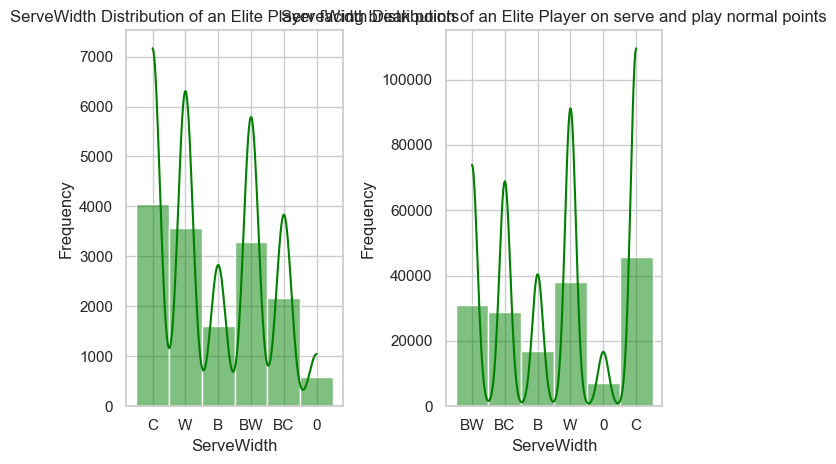

In [90]:
# ServeWidth distribution
plt.subplot(1, 2, 1)
sns.histplot(filtered_pat2['ServeWidth'], kde=True, bins=10, color='green')
plt.title('ServeWidth Distribution of an Elite Player facing break points')
plt.xlabel('ServeWidth')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(filtered_pat3['ServeWidth'], kde=True, bins=20, color='green')
plt.title('ServeWidth Distribution of an Elite Player on serve and play normal points')
plt.xlabel('ServeWidth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/1692704621.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pat['ServeDepthWidth'] = filtered_pat['ServeDepth'] + "_" + filtered_pat['ServeWidth']


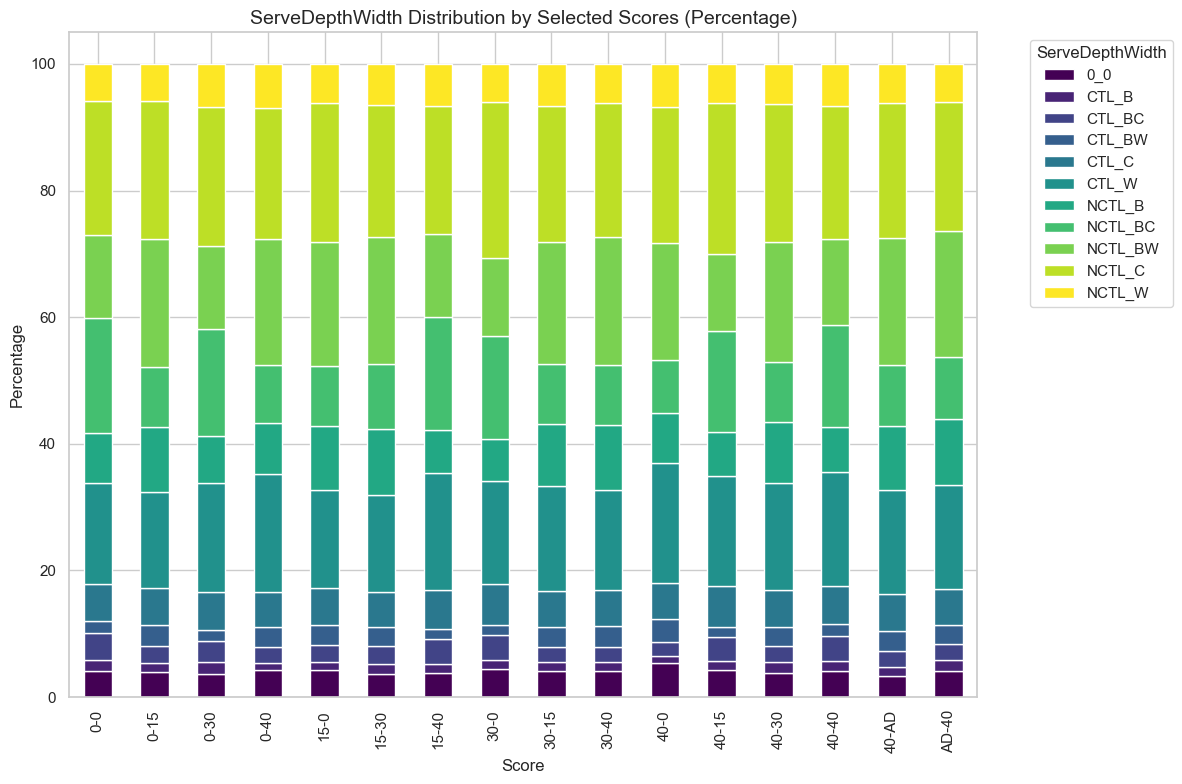

In [91]:
# 1. Filter for specific Score values
selected_scores = ['0-0', '15-0', '0-15', '30-0', '0-30', '30-15', '15-30', 
                   '40-15', '15-40', '40-0', '0-40', '40-30', '30-40', 
                   '40-40', 'AD-40', '40-AD']
filtered_pat = pat[pat['Score'].isin(selected_scores)]

# 2. Concatenate ServeDepth and ServeWidth to create ServeDepthWidth
filtered_pat['ServeDepthWidth'] = filtered_pat['ServeDepth'] + "_" + filtered_pat['ServeWidth']

# 3. Group by Score and calculate proportions
grouped = filtered_pat.groupby(['Score', 'ServeDepthWidth']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Convert to percentages

# 4. Plot stacked bar chart
ax = proportions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
ax.set_title('ServeDepthWidth Distribution by Selected Scores (Percentage)', fontsize=14)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('Score', fontsize=12)
ax.legend(title='ServeDepthWidth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

## Summary

#### We observe that the serve distribution of each player during different moments of the games are not different. This may be due to the fact that the players themselves cannot always control the outcomes of the serve shot (they may have missed the first serve, or not hit the targeted position). It is understandable that professional players sometimes make mistakes. 

#### With this analysis and the regression models, we may conclude that the serve distribution in particular and serve performance in general does not play an extremely significant role in the players' performance at Grand Slam. It is even harder to keep the serve performance consistently, considering the long duration of each Grand Slam match (best of 5 instead of best of 3 like other tournaments). The dashboard below will partially reclaimed this argument, and will argue that elite players will have a higher percentage of winning long rallies compared to their non-elite compatriots. 

In [92]:
# Assuming player_stats is a pandas DataFrame
player_stats = player_stats[player_stats.isnull().sum(axis=1) <= 15]

player_stats.head()


,player_name,0_0,CTL_B,CTL_BC,CTL_BW,CTL_C,CTL_W,NCTL_B,NCTL_BC,NCTL_BW,...,14_%,15+_%,total_deficit,avg_deficit,elite_numeric,avg_Forehand,avg_Backhand,Deep_Return%,avg_ace,avg_df
0,Adrian Mannarino,45.0,27.0,50.0,27.0,87.0,315.0,116.0,276.0,316.0,...,38.095238,42.335766,-59.0,-1.787879,0,13.909091,7.757576,35.521013,7.030303,2.939394
2,Alejandro Davidovich Fokina,74.0,62.0,96.0,65.0,82.0,246.0,292.0,359.0,301.0,...,54.545455,47.872340,69.0,1.916667,0,16.666667,7.472222,36.455696,4.416667,3.694444
5,Alex Bolt,2.0,4.0,3.0,3.0,8.0,41.0,17.0,28.0,17.0,...,38.461538,61.290323,-18.0,-1.800000,0,4.800000,2.700000,42.857143,10.400000,2.600000
6,Alex De Minaur,96.0,48.0,123.0,85.0,114.0,289.0,258.0,453.0,475.0,...,70.588235,55.769231,90.0,1.875000,0,15.395833,6.937500,35.233645,5.625000,3.812500
8,Alex Molcan,34.0,13.0,29.0,22.0,56.0,82.0,95.0,169.0,151.0,...,30.000000,37.037037,-40.0,-2.352941,0,17.000000,8.705882,35.331230,5.529412,3.588235


In [93]:
csv_file_path = "player_stats.csv"
player_stats.to_csv(csv_file_path, index=False)

In [94]:
print(wimus.columns)

Index(['match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon', 'P2GamesWon',
       'SetWinner', 'GameNo', 'GameWinner', 'PointNumber', 'PointWinner',
       'PointServer', 'Speed_KMH', 'P1Score', 'P2Score', 'P1Momentum',
       'P2Momentum', 'P1PointsWon', 'P2PointsWon', 'P1Ace', 'P2Ace',
       'P1Winner', 'P2Winner', 'P1DoubleFault', 'P2DoubleFault', 'P1UnfErr',
       'P2UnfErr', 'P1NetPoint', 'P2NetPoint', 'P1NetPointWon',
       'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint', 'P1BreakPointWon',
       'P2BreakPointWon', 'History', 'Speed_MPH', 'P1BreakPointMissed',
       'P2BreakPointMissed', 'ServeIndicator', 'ServeNumber', 'WinnerType',
       'WinnerShotType', 'P1DistanceRun', 'P2DistanceRun', 'RallyCount',
       'ServeWidth', 'ServeDepth', 'ReturnDepth', 'player1', 'player2',
       'Returned', 'DoubleFault', '0-4', '5-8', '9+', '0-4_w', '5-8_w', '9+_w',
       '0-4_l', '5-8_l', '9+_l', 'Point_Winner', 'Point_Loser'],
      dtype='object')


In [95]:
filtered_pat.columns

Index(['match_id', 'SetNo', 'P1GamesWon', 'P2GamesWon', 'SetWinner', 'GameNo',
       'GameWinner', 'PointNumber', 'PointWinner', 'PointServer', 'Speed_KMH',
       'P1Score', 'P2Score', 'P1Ace', 'P2Ace', 'P1DoubleFault',
       'P2DoubleFault', 'P1UnfErr', 'P2UnfErr', 'P1NetPoint', 'P2NetPoint',
       'P1NetPointWon', 'P2NetPointWon', 'ServeWidth', 'ServeDepth',
       'ReturnDepth', 'player1', 'player2', 'P1BreakPoint', 'P2BreakPoint',
       'P1BreakPointWon', 'P2BreakPointWon', 'Point_Winner', 'Point_Loser',
       'ScoreConcat', 'GameConcat', 'Score', 'Games', 'player1_e', 'player2_e',
       'ServeDepthWidth'],
      dtype='object')

# FINAL DASHBOARD

In [96]:
import panel as pn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import os
import matplotlib.colors as mcolors


# Initialize Panel extension
pn.extension()

# Title and Introduction
header = pn.pane.Markdown("## Player Statistics Dashboard presented by Minh Trinh, collaborated with Professor Eren Bilen")
intro = pn.pane.Markdown("""
Welcome to the Complex Tennis Player Statistics Interactive Dashboard!
This interactive dashboard illustrates a comprehensive overview of individual player statistics in Grand Slam events from 2019 to 2023. You can compare the selected player’s performance against the averages of other
elite and non-elite players, as well as visualize their serve distribution.""")
comparison_table_title = pn.pane.Markdown("""
### Comparison Table: Player vs Elite vs Non-Elite Statistics 
##### Elite players are the players with the best performances in Grand Slam from 2019-2023. The list includes: Novak Djokovic, Alexander Zverev, Andrey Rublev, Carlos Alcaraz, Casper Ruud, Daniil Medvedev, Dominic Thiem, Felix Auger Aliassime, Matteo Berrettini, Rafael Nadal, Roger Federer, Stefanos Tsitsipas
""")
# Sidebar Dropdown for Player Selection
selected_player_widget = pn.widgets.Select(
    name="Select Player", 
    options=list(player_stats['player_name'].unique()),  # Convert to list
    value=player_stats['player_name'].iloc[0],
    width=200,
    sizing_mode="stretch_width"
)
image_path = "novakthegoat.jpg"  # Replace with the correct path if it's not in the working directory

if os.path.exists(image_path):
    sidebar_image = pn.layout.Column(
        pn.pane.JPG(image_path, width=300, height=200),
        align="center"
    )
else:
    print(f"Image '{image_path}' not found. Using a placeholder.")
    sidebar_image = pn.pane.Markdown("### [Image Not Found]")

# Calculate Average Stats for Elite and Non-Elite Players
elite_avg_stats = player_stats[player_stats["elite_numeric"] == 1].mean(numeric_only=True)
non_elite_avg_stats = player_stats[player_stats["elite_numeric"] == 0].mean(numeric_only=True)

# Function to create comparison table
def create_comparison_table(selected_player):
    player_data = player_stats[player_stats["player_name"] == selected_player].iloc[0]
    
    comparison_table = pd.DataFrame({
        "Metric": [
            "Grand Slam Matches Win%","Avg 1st Serve Speed (KM/H)", "Avg 2nd Serve Speed (KM/H)", "Matches Played", 
            "Aces per Match", "Double Faults per Match", "Deep Return %",
             "1st Serve In per Match",
            "1st Serve Won per Match", "2nd Serve Won per Match", "Break Points Saved per Match",
            "Break Points Faced per Match", "Break Points Saved Percentage", "Deficit per Match",
            "Forehand Winners per Match", "Backhand Winners per Match", "0-4 Rallies Win %", "5-8 Rallies Win %"
            , "9+ Rallies Win %"
        ],
        f"{selected_player}'s Stats": [
            player_data["Match_Win_Percentage"],player_data["Avg_1st_ServeSpeed"], player_data["Avg_2nd_ServeSpeed"], player_data["match_played"],
            player_data["avg_ace"], player_data["avg_df"], player_data["Deep_Return%"],
            player_data["1stIn_per_match"], 
            player_data["1stWon_per_match"], player_data["2ndWon_per_match"], player_data["bpSaved_per_match"],
            player_data["bpFaced_per_match"], player_data["bpSaved%"], player_data["avg_deficit"],
            player_data["avg_Forehand"], player_data["avg_Backhand"],player_data["0-4_%"],
            player_data["5-8_%"],player_data["9+_%"]
        ],
        "Elite Players' Average": [
            elite_avg_stats["Match_Win_Percentage"],elite_avg_stats["Avg_1st_ServeSpeed"], elite_avg_stats["Avg_2nd_ServeSpeed"], elite_avg_stats["match_played"],
            elite_avg_stats["avg_ace"], elite_avg_stats["avg_df"], elite_avg_stats["Deep_Return%"],
            elite_avg_stats["1stIn_per_match"],
            elite_avg_stats["1stWon_per_match"], elite_avg_stats["2ndWon_per_match"], elite_avg_stats["bpSaved_per_match"],
            elite_avg_stats["bpFaced_per_match"], elite_avg_stats["bpSaved%"], elite_avg_stats["avg_deficit"],
            elite_avg_stats["avg_Forehand"], elite_avg_stats["avg_Backhand"],elite_avg_stats["0-4_%"],
            elite_avg_stats["5-8_%"],elite_avg_stats["9+_%"]
        ],
        "Non-Elite Players' Average": [
            non_elite_avg_stats["Match_Win_Percentage"],non_elite_avg_stats["Avg_1st_ServeSpeed"], non_elite_avg_stats["Avg_2nd_ServeSpeed"], non_elite_avg_stats["match_played"],
            non_elite_avg_stats["avg_ace"], non_elite_avg_stats["avg_df"], elite_avg_stats["Deep_Return%"],
            non_elite_avg_stats["1stIn_per_match"],
            non_elite_avg_stats["1stWon_per_match"], non_elite_avg_stats["2ndWon_per_match"], non_elite_avg_stats["bpSaved_per_match"],
            non_elite_avg_stats["bpFaced_per_match"], non_elite_avg_stats["bpSaved%"], non_elite_avg_stats["avg_deficit"],
           non_elite_avg_stats["avg_Forehand"], non_elite_avg_stats["avg_Backhand"], non_elite_avg_stats["0-4_%"],
            non_elite_avg_stats["5-8_%"],non_elite_avg_stats["9+_%"]
        ]
    })
    
    # Ensure that values are numeric and format with 2 decimals without trailing zeros
    for col in comparison_table.columns[1:]:
        comparison_table[col] = comparison_table[col].apply(lambda x: f"{x:.2f}".rstrip('0').rstrip('.'))
    
    return comparison_table

def highlight_values(row):
    """
    Apply color formatting to highlight the highest and lowest values in a row.
    Green for the largest value, red for the smallest value.

    Args:
        row (pd.Series): A row of numeric values.

    Returns:
        list: A list of CSS styles for each value in the row.
    """
    # Convert row to numeric values, ignoring non-numeric values
    numeric_values = pd.to_numeric(row, errors='coerce')

    # Identify max and min values (ignoring NaNs)
    max_val = numeric_values.max()
    min_val = numeric_values.min()

    # Apply colors based on max and min values
    colors = [
        "color: green;" if value == max_val else
        "color: red;" if value == min_val else
        ""
        for value in numeric_values
    ]
    return colors
# Function to update the dashboard dynamically
def update_dashboard(event):
    selected_player = selected_player_widget.value
    comparison_table = create_comparison_table(selected_player)
    
    # Apply styling to the table
    styled_table = (
        comparison_table.set_index("Metric")
        .style.apply(highlight_values, axis=1, subset=[f"{selected_player}'s Stats", "Elite Players' Average", "Non-Elite Players' Average"])
    )
    
    comparison_table_pane.object = styled_table

# Create initial comparison table for the first player
comparison_table_pane = pn.pane.DataFrame(create_comparison_table(selected_player_widget.value), width=600, height=200)

# Watch the player selection to update the table
selected_player_widget.param.watch(update_dashboard, 'value')


# Watch the player selection to update the table
selected_player_widget.param.watch(update_dashboard, 'value')

note = pn.pane.Markdown("""
**Note:**
- The comparison table shows the player's statistics against the averages of elite and non-elite players.
- **Elite players** are those ranked in the top 10, while **Non-Elite players** are those ranked outside of the top 10.
- This dashboard helps to visualize the player's performance in comparison to their peers in Grand Slam events.
""", width=400, height=200)

# Arrange the comparison table and the note side by side
layout = pn.layout.Column(
    pn.Row(comparison_table_pane, note),
    selected_player_widget
)


####################################################################################################################

# Define court regions
regions_ctl = {
    'W': {'x_min': 14, 'x_max': 16.25, 'y_min': 13, 'y_max': 18, 'color': '#d7d7d7'},
    'BW': {'x_min': 16.25, 'x_max': 18.5, 'y_min': 13, 'y_max': 18, 'color': '#1f1f1f'},
    'B': {'x_min': 18.5, 'x_max': 20.75, 'y_min': 13, 'y_max': 18, 'color': '#141414'},
    'BC': {'x_min': 20.75, 'x_max': 23, 'y_min': 13, 'y_max': 18, 'color': '#2d2d2d'},
    'C': {'x_min': 23, 'x_max': 25, 'y_min': 13, 'y_max': 18, 'color': '#484848'}
}
regions_nctl = {
    'W': {'x_min': 14, 'x_max': 16.25, 'y_min': 18, 'y_max': 23, 'color': '#4d4d4d'},
    'BW': {'x_min': 16.25, 'x_max': 18.5, 'y_min': 18, 'y_max': 23, 'color': '#a7a7a7'},
    'B': {'x_min': 18.5, 'x_max': 20.75, 'y_min': 18, 'y_max': 23, 'color': '#636363'},
    'BC': {'x_min': 20.75, 'x_max': 23, 'y_min': 18, 'y_max': 23, 'color': '#888888'},
    'C': {'x_min': 23, 'x_max': 25, 'y_min': 18, 'y_max': 23, 'color': '#ffffff'}
}

# Define label positions
label_positions = {
    'NCTL_C': {'x': 45, 'y': 35},
    'NCTL_BC': {'x': 40, 'y': 45},
    'NCTL_B': {'x': 25, 'y': 45},
    'NCTL_BW': {'x': 15, 'y': 35},
    'NCTL_W': {'x': 5, 'y': 45},
    'CTL_C': {'x': 45, 'y': 15},
    'CTL_BC': {'x': 42, 'y': 5},
    'CTL_B': {'x': 22, 'y': 7},
    'CTL_BW': {'x': 7, 'y': 5},
    'CTL_W': {'x': 5, 'y': 15}
}

# Function to prepare serve data for a player
def prepare_player_serve_data(player_name):
    player_data = player_stats[player_stats['player_name'] == player_name]
    serve_data = []
    for col in player_data.columns:
        if col.startswith("CTL") or col.startswith("NCTL"):
            serve_depth, serve_width = col.split("_")
            count = player_data[col].values[0]
            serve_data.append({
                "ServeDepth": serve_depth,
                "ServeWidth": serve_width,
                "count": count
            })
    serve_df = pd.DataFrame(serve_data)
    total_shots = serve_df['count'].sum()
    serve_df['percentage'] = (serve_df['count'] / total_shots) * 100
    return serve_df

# Function to add labels
def add_labels_for_regions(data_counts, label_positions, region_type, regions):
    for _, row in data_counts.iterrows():
        serve_width = row['ServeWidth']
        count = row['count']
        percentage = row['percentage']

        # Construct the key dynamically
        label_key = f"{region_type}_{serve_width}"

        # Check if label_key exists in label_positions
        if label_key in label_positions:
            x = label_positions[label_key]['x']
            y = label_positions[label_key]['y']
        else:
            raise ValueError(f"Label position for '{label_key}' not defined in label_positions.")

        # Label content
        label = f"{region_type} {serve_width}\n{count} shots\n({percentage:.2f}%)"
        
        # Draw line to region center
        region_center_x = (regions[serve_width]['x_min'] + regions[serve_width]['x_max']) / 2
        region_center_y = (regions[serve_width]['y_min'] + regions[serve_width]['y_max']) / 2
        plt.plot([x, region_center_x], [y, region_center_y], color='white', lw=1)

        # Add label background box
        label_box = patches.FancyBboxPatch(
            (x - 6, y - 3.5), 12, 7, boxstyle="round,pad=0.3",
            edgecolor='none', facecolor=regions[serve_width]['color'], alpha=0.6
        )
        plt.gca().add_patch(label_box)
        
        # Add text
        plt.text(x, y, label, fontsize=9, ha='center', va='center', color='white')

# Function to dynamically assign colors based on serve percentages
def assign_dynamic_colors(regions, data_counts):
    """
    Assign colors to regions dynamically based on serve percentages, using a seismic color scale.

    Args:
        regions (dict): Dictionary of regions (CTL or NCTL).
        data_counts (pd.DataFrame): Serve data with percentage for each region.

    Returns:
        dict: Updated regions with dynamically assigned colors.
    """
    # Normalize percentages between -1 and 1 for seismic color mapping
    percentages = data_counts['percentage'].values
    normalized = 2 * ((percentages - percentages.min()) / (percentages.max() - percentages.min())) - 1 if len(percentages) > 1 else [0] * len(percentages)

    # Map normalized values to the seismic color scale
    for region, norm_val in zip(data_counts['ServeWidth'], normalized):
        if norm_val < 0:
            # Blue to white (low values): interpolate between Blue (#0000FF) and White (#FFFFFF)
            r = int(255 * (1 + norm_val))  # Increase red
            g = int(255 * (1 + norm_val))  # Increase green
            b = 255  # Blue remains max
        else:
            # White to red (high values): interpolate between White (#FFFFFF) and Red (#FF0000)
            r = 255  # Red remains max
            g = int(255 * (1 - norm_val))  # Decrease green
            b = int(255 * (1 - norm_val))  # Decrease blue

        color = f'#{r:02x}{g:02x}{b:02x}'  # Seismic hex color
        regions[region]['color'] = color

    return regions

def load_court_image():
    court_img_path = '/Users/minhtrinh/wim/wimbledon_grass_court.jpg'
    if os.path.exists(court_img_path):
        return mpimg.imread(court_img_path)
    else:
        print("Court image not found. Using a placeholder.")
        return np.ones((500, 500, 3))  # White placeholder image
    

def plot_combined_serve_distribution(player_name):
    """
    Plot the combined serve distribution for the selected player.
    Args:
        player_name (str): Name of the selected player.
    Returns:
        matplotlib.figure.Figure: The plot figure for Panel rendering.
    """
    # Prepare serve data
    serve_df = prepare_player_serve_data(player_name)

    # Separate CTL and NCTL data
    ctl_data = serve_df[serve_df['ServeDepth'] == 'CTL']
    nctl_data = serve_df[serve_df['ServeDepth'] == 'NCTL']
    one_data = pd.concat([ctl_data, nctl_data], ignore_index=True)
    # Assign dynamic colors based on percentages
    assign_dynamic_colors(regions_ctl, ctl_data)
    assign_dynamic_colors(regions_nctl, nctl_data)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 7))  # Expanded figure size
    court_img = load_court_image()
    ax.imshow(court_img, extent=[0, 50, 0, 50])
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)

    # Plot CTL regions
    for region, data in regions_ctl.items():
        ax.add_patch(patches.Rectangle(
            (data['x_min'], data['y_min']),
            data['x_max'] - data['x_min'], 
            data['y_max'] - data['y_min'], 
            linewidth=1, edgecolor='black', facecolor=data['color'], alpha=0.5
        ))

    # Plot NCTL regions
    for region, data in regions_nctl.items():
        ax.add_patch(patches.Rectangle(
            (data['x_min'], data['y_min']),
            data['x_max'] - data['x_min'], 
            data['y_max'] - data['y_min'], 
            linewidth=1, edgecolor='black', facecolor=data['color'], alpha=0.5
        ))

    # Add labels for CTL and NCTL regions
    add_labels_for_regions(ctl_data, label_positions, 'CTL', regions_ctl)
    add_labels_for_regions(nctl_data, label_positions, 'NCTL', regions_nctl)

    # Titles and axis labels
    notes = (
        "Notes:\n"
        "1. ServeWidth: Categorizes serve placement horizontally:\n"
        "   - W: Wide\n"
        "   - BW: Body Wide"
        "   - B: Body\n"
        "   - BC: Body Center"
        "   - C: Center\n\n"
        "2. ServeDepth: Categorizes serve placement vertically:\n"
        "   - CTL: Close to the Service Line\n"
        "   - NCTL: Not Close to the Service Line\n\n"
        "3. Dynamic Colors: Represent the proportion of serves in each region, with darker red shades indicating higher percentages, and darker blye shades indicating lower percentages."
    )

    # Add the notes to the right of the graph
    ax_notes = fig.add_axes([0.65, 0.1, 0.2, 0.8])  # Add new axes for the notes
    ax_notes.axis('off')  # Turn off axes for the notes
    ax_notes.text(
        0, 1, notes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8), wrap=True
    )
    # Add a color legend below the notes
    ax_colorbar = fig.add_axes([0.65, 0.5, 0.25, 0.02])  # Position for the colorbar
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["darkblue", "red"])
    norm = mcolors.Normalize(vmin=0, vmax=100)
    cb = plt.colorbar(
        plt.cm.ScalarMappable(norm=norm, cmap=cmap),
        cax=ax_colorbar, orientation='horizontal'
    )
    cb.set_label("Percentage of Serves (%)", fontsize=10)
    cb.ax.tick_params(labelsize=8)
    
    ax.set_title(f'Serve Distribution by {player_name}', fontsize=18, weight='bold')
    ax.set_xlabel('Serve Width', fontsize=15)
    ax.set_ylabel('Serve Depth', fontsize=15, rotation=0, labelpad=40)

    # Adjust layout to avoid clipping
    plt.tight_layout(rect=[0, 0, 0.7, 1])  # Leave space for the notes on the right

    return fig

def plot_player_line_graph(player_name):
    # Get the percentages for the player
    player_data = player_stats[player_stats['player_name'] == player_name][['1_%', '2_%', '3_%', '4_%', 
                                                                            '5_%', '6_%', '7_%', '8_%', '9_%', '10_%', 
                                                                            '11_%', '12_%', '13_%', '14_%', '15+_%']].values.flatten()
    
    # Get the average percentages for elite players
    elite_data = player_stats[player_stats['elite_numeric'] == 1][['1_%', '2_%', '3_%', '4_%', 
                                                                   '5_%', '6_%', '7_%', '8_%', '9_%', '10_%', 
                                                                   '11_%', '12_%', '13_%', '14_%', '15+_%']].mean().values

    # Plot the line graph
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(range(1, 16), player_data, marker='o', color='b', label=player_name)
    ax.plot(range(1, 16), elite_data, marker='v', color='r', label='Elite Players (Average)')

    ax.set_title(f'Rally Category Percentages for {player_name}')
    ax.set_xlabel('Rally Length (Points)')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticks(range(1, 16))
    ax.set_xticklabels([f'{i}' for i in range(1, 16)])
    ax.legend()
    
    return fig

# Updated: Panel integration for serve distribution
serve_distribution_pane = pn.pane.Matplotlib(
    plot_combined_serve_distribution(selected_player_widget.value), 
    width=800, height=600
)
# Create a new Matplotlib pane for the line graph
line_graph_pane = pn.pane.Matplotlib(
    plot_player_line_graph(selected_player_widget.value), 
    width=800, height=600
)

# Updated: Watch player selection for serve graph and line graph
def update_graphs(event):
    # Update the serve distribution graph
    serve_distribution_pane.object = plot_combined_serve_distribution(selected_player_widget.value)
    
    # Update the line graph
    line_graph_pane.object = plot_player_line_graph(selected_player_widget.value)

# Watch for player selection changes
selected_player_widget.param.watch(update_graphs, 'value')

# Updated: Create comparison table dynamically
comparison_table_pane = pn.pane.DataFrame(
    create_comparison_table(selected_player_widget.value), 
    width=600, height=400
)

# Updated: Dynamic dashboard layout with line graph
template = pn.template.FastListTemplate(
    title='Complex Professional Tennis Player Statistics in Grand Slams from 2019-2023', 
    sidebar=[
        pn.pane.Markdown("# Complex Player Statistics Interactive Dashboard"), 
        pn.pane.Markdown("### This dashboard is presented by Minh Trinh in collaboration with professor Eren Bilen. \n Contact: quangminh711@gmail.com"),
        intro,
        sidebar_image,
        selected_player_widget
    ],
    main=[
        pn.Row(
            pn.Column(width=150),
            pn.Column(comparison_table_title, comparison_table_pane, margin=(0, 25), width=300)
        ),
        pn.Row(
            serve_distribution_pane
        ),
        pn.Row(
            line_graph_pane  # Add the line graph below the serve distribution
        )
    ],
    accent_base_color="#90EE90",  
    header_background="#90EE90", 
    
    )


template.servable()
template.show()

/var/folders/9n/vcnthth57d14bptc1cdgq9g80000gn/T/ipykernel_13917/323088292.py:372: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.7, 1])  # Leave space for the notes on the right


Launching server at http://localhost:52422


## Summary
#### This dashboard includes a table that compares selected player with the average elite and non-elite players respectively, excluding the selected player within the calculation. The second graph is a visualization chart that displays the serve distribution of the selected player. Finally, the third graph is a visualization line chart that displays the win percentage of the selected players, grouping by 1 to 15+ rally counts. 

#### We may observe a considerable difference in the rally counts statistics (within the table and the line chart), while experiencing a less notable difference in serve statistics between elite players, and non-elite players. This suggests that elite players, although may or may not have a decent serve performance, will achieve greater results than non-elite players because they have better combat skills and usually win in long rallies. This is true, especially considering the modern time meta of tennis has evolved compared to the serve-volley era,  as current top players are mostly aggressive baseliners, who can attack and defend well in the baseline, and try hard to take control during the game. This is the main difference between elite players who wins tournaments and advanced deeply in the Grand Slam tournament, and non-elite players who may not achieve as much as the elite counterparts. The research suggests that players should improve their groundstroke skills in order to increase the win percentage of long rallies, along with enhancing the consistency of serve performance.  

In [97]:
# Filter players with elite_numeric equal to 1
elite_players = player_stats[player_stats['elite_numeric'] == 1]

# Display player names
elite_player_names = elite_players['player_name']
print(elite_player_names)


11          Alexander Zverev
19             Andrey Rublev
38            Carlos Alcaraz
39               Casper Ruud
50           Daniil Medvedev
57             Dominic Thiem
73     Felix Auger Aliassime
142        Matteo Berrettini
156           Novak Djokovic
170             Rafael Nadal
178            Roger Federer
189       Stefanos Tsitsipas
Name: player_name, dtype: object
